## Introduction

Drug discovery in the past involved hit and trial of different remedies without understanding the mechanism of action behind them. Today, drug exploration is done in a more targeted manner where a particular protein related to the disease is identified and then the molecule/drug that can modulate the protein is manufactured. These protein sites are known as mechanism-of-action or MoA of the drug and can vary across cell types. Knowledge of these MoAs in different cell types provides information about how the drug affects the various organs in the body and helps establish drug safety. This cell specific information is highly applicable to diseases like cancer where each patient's pathology is unique owing to their distinctive genetic makeup. 

To identify MoAs for new drugs, we can build a machine learning model that takes in the cellular responses such as gene expression and cell viability, to known drugs as features and gives out a score for each MoA. The new drug's cellular responses on a sample of cells can be fed as features to the model and a probability value for each MoA obtained. The hypothesis thus becomes that a drug's ability to modulate a gene's expression in different cell types as well as its ability to kill cells in those cell types, gives an indication of its sites of action. The basis for relying on gene expression as a predictor of MoA can best be explained by an example. The image below shows the cAMP signaling pathway. When PGE2 binds to its receptor, a pathway is activated leading to the increased expression of a particular gene. However, that same gene's expression is reduced if LTB4 binds to its receptor. If a drug causes this same gene to reduce its expression then we can have an idea about its possible mechanism of action. Similarly, cell viability values are used to assess if the drug has an harmful effect on that particular cell type. For example, if the mechanism of a cell's apoptosis(cell death) is known, then a reduced cell viability value indicates the drug's possible binding sites or mechanism of action.<br><img src="my_data/image.png" width="400" >

## Data Architecture

In this work a drug's cellular responses in 100 different cell types have considered as features. 

**train_features**
<br> contains the features for each sig_id(unique row identifier). There are 6 rows corresponding to each drug for each combination of 'cp_dose'(high or low) and measurement time after dose registration 'cp_time'(24,48 or 72 hours). 'cp_type' indicates if the sample is treated with an actual drug (trt_cp) or with a control (ctl_vehicle). Apart from these 3 features the remaining 872 features are divided into g. and c. type columns. The former are gene expression values for 772 genes averaged across 100 cell types. A positive values indicate upregulation of that gene on average and negative value indictes downregulation by he drug. Note this dataset loses on cell type gene expression by taking a pooled average. The reason for this averaged signal were the increased costs of running gene expression experiments separately for each of the 100 cell types. The c. columns correspond to viability values of the 100 cell types.  

In [1]:
features = read.csv("my_data/features.csv")
head(features)

,sig_id,cp_type,cp_time,cp_dose,g.0,g.1,g.2,g.3,g.4,g.5,⋯,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,⋯,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
2,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,⋯,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
3,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,⋯,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
4,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,⋯,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
5,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,⋯,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
6,id_001762a82,trt_cp,24,D1,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,⋯,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990


**targets_scored**
<br> contains the MoA label values for each sig_id. There are 206 labels each with a value between 0 and 1, where 1 stands for a 100% certainty in this label as an MoA for the sig_id. These are the labels our models will be predicting.

In [2]:
labels = read.csv("my_data/targets_scored.csv")
head(labels)

,sig_id,X5.alpha_reductase_inhibitor,X11.beta.hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,⋯,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,id_000644bb2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,id_000779bfc,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,id_000a6266a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,id_0015fd391,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,id_001626bd3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,id_001762a82,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


All column values above appear 0 because most drugs have only 1 MoA, as the analysis below shows. 

For any other information about the preliminary data check this link https://www.kaggle.com/c/lish-moa/data.

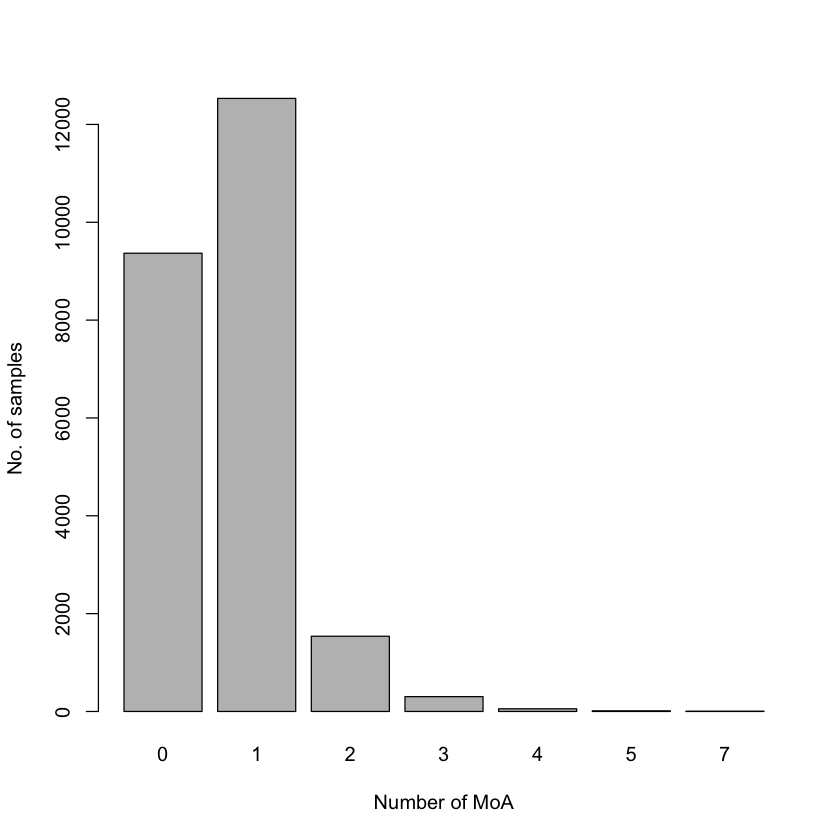

In [37]:
library(plyr)
counts <- rowSums(labels[,-1]!=0)
barplot(height=count(counts)$freq, names=count(counts)$x,xlab="No. of MoA", ylab="No. of samples")

## Data analysis

### Empty labels
You can notice above that a large portion of samples have no MoA labels assigned to them. The first hypothesis was that all these samples are control samples. However, upon further analysis as shown below, the 0 bin is split across control and actual drug samples. While these no label samples may appear like an anomaly at first, they are of significance since the models can learn effect of a drug by comparing against the effects of these baseline samples.

In [46]:
# Control MoA counts
controls = features[features$cp_type=='ctl_vehicle',]
counts <- rowSums(labels[labels$sig_id %in% controls$sig_id,][,-1]!=0)
print("Control samples - Possible number of labels and their frequency:")
count(counts)
# Actual drug MoA counts
actual = features[features$cp_type=='trt_cp',]
counts <- rowSums(labels[labels$sig_id %in% actual$sig_id,][,-1]!=0)
print("Actual Drug samples - Possible number of labels and their frequency:")
count(counts)

[1] "Control samples - Possible number of labels and their frequency:"


x,freq
<dbl>,<int>
0,1866


[1] "Actual Drug samples - Possible number of labels and their frequency:"


x,freq
<dbl>,<int>
0,7501
1,12532
2,1538
3,303
4,55
5,13
7,6


Since 1 sample can have more than 1 label, this problem is a multi-label prediction task(the whole numbers in column 'x' also indicate that each MoA is either a 1 or a 0). However, as you can see above most samples have only 1 MoA and so we can convert this complex multi-label problem to a single label by creating separate models for each output label. However, before we go into building models, we need to reduce the number of features from 872 to a more mangeable number. For that we use PCA.

### PCA
We wish to use PCA as features for training models later on, so we should divide the dataset into training and testing sets now. This is because PCA generated on the whole dataset allows us to have information about the test set and hence enable data leakage. This would reduce the generalizability capability of the model. 

In [22]:
# install.packages('caret')
suppressMessages(library(caret))
# 20% samples will be testing and remaining will be training
idx <- sample(1:nrow(labels), nrow(labels)*0.8)
x_train <- features[idx,]
y_train <- labels[idx,]
x_test <- features[-idx,]
y_test <- labels[-idx,]

In [93]:
dim(x_train)
dim(x_test)

[1] 19051   876

[1] 4763  876

Since there are 3 columns with string type values we first convert them to a numeric value. So for example, the 2 values in cp_type 'ctl_vehicle' and 'trt_cp' will now become 1 and 2. And similarly for the other columns as you can see below. 

In [27]:
library(dplyr)

dataFull <- x_train
# converting the string values in cp_type, cp_dose and cp_time to integer factors
cols <- c("cp_type", "cp_time", "cp_dose")
for (var in cols){
    dataFull[,var] <- as.integer(factor(dataFull[,var]))
}
# sig_id is only an indexing and not a useful feature and hence remove it
dataFull <- dataFull[,-1]
head(dataFull) 

# pca
pca <- prcomp(dataFull, center = TRUE, scale. = TRUE)

,cp_type,cp_time,cp_dose,g.0,g.1,g.2,g.3,g.4,g.5,g.6,⋯,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17683,1,3,1,0.9493,-0.9398,0.3578,0.0672,0.3198,0.9069,1.5150,⋯,-0.4387,-0.6675,0.6063,-0.3283,-0.3925,0.6037,-0.6204,-1.0800,0.2765,0.0237
13902,2,1,2,0.6718,0.7570,0.0233,-0.0626,0.6887,-1.6650,0.3263,⋯,-0.0704,0.7504,0.0117,-1.0740,-0.5395,-0.2344,0.3291,-0.8144,-0.3932,-0.6322
6086,1,3,1,0.0214,-0.0020,-0.8601,0.1207,0.0963,0.7908,1.1580,⋯,0.0986,0.3026,0.3513,-0.0052,0.5523,0.7112,0.3156,0.0125,0.4891,0.8967
16065,2,1,1,-0.4665,0.1965,0.3032,-0.6903,0.1250,3.2790,-0.5663,⋯,-0.4982,-0.6644,0.4474,-2.2290,-0.0974,-0.5061,-0.8043,-0.5220,-0.8418,-0.7953
5991,1,1,2,0.8008,-0.1277,0.2647,0.3235,-0.4194,-0.5724,-0.4217,⋯,-0.7123,-0.5374,-0.8878,-0.5084,-0.2343,-0.6601,-0.5862,-0.1745,-0.2601,-0.4301
3926,2,2,2,-0.6253,-0.0571,0.1004,-0.1497,-0.2746,1.0560,-0.7937,⋯,0.3207,0.0021,-0.6279,-0.4517,0.0495,-0.6936,0.0498,-0.5176,-0.4873,0.2736


Checking the variance explained by the first 5 PCAs so we can decided which PCs to keep.

Warning message:
“package ‘factoextra’ was built under R version 3.6.2”
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



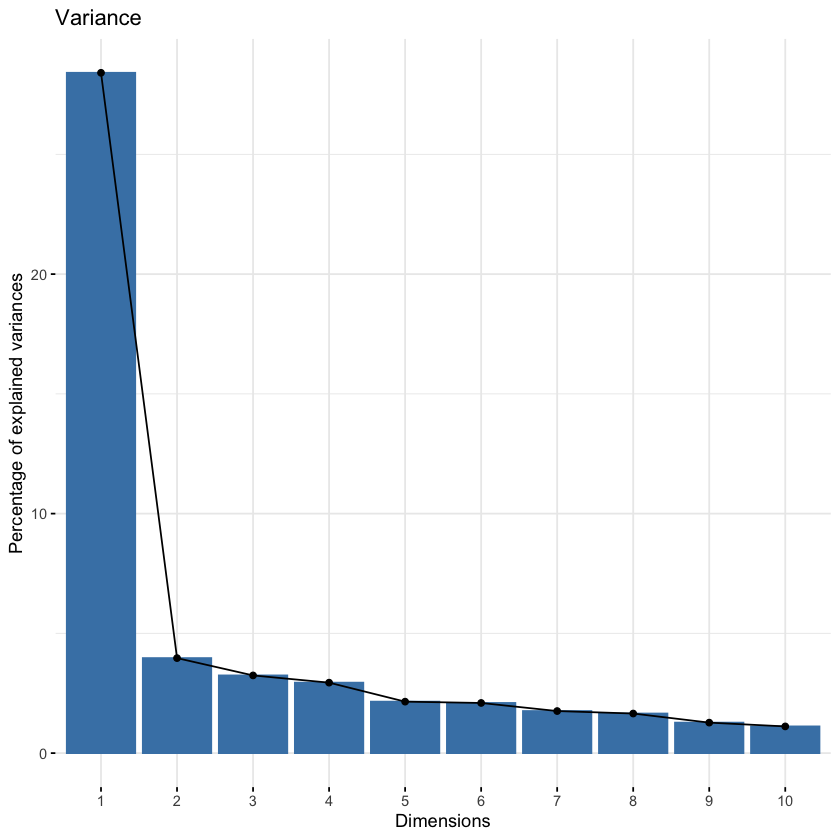

In [28]:
# install.packages('factoextra')
library('factoextra') # makes PCA analysis easy
fviz_eig(pca, title = "Variance", ncp = 10)


As we can see the first dimension explains more than ~30% of the variance. Let's evaluate how many components we would need to capture 90% of variance. 

In [29]:
# get percentage variance explained by PCs
get90varComp <- function(pca){
    percentage_exp_var <- fviz_eig(pca, ncp = 1000)
    cumul <- 
    function(i, DF){
    c = sum(DF$eig[1:i])
    return(c)
    }
    # Perform a cumulative sum of the variances 
    PcCumul <- percentage_exp_var$data
    CumulVariance <- sapply(1:nrow(PcCumul), FUN = cumul, DF = PcCumul)
    return(min(which(CumulVariance >= 90)))
}

# The smallest index where 80% variance is reached
percVarBear <- get90varComp(pca)

cat("You need", percVarBear, "principal components to cover at least 90% of the variance.")

You need 387 principal components to cover at least 90% of the variance.

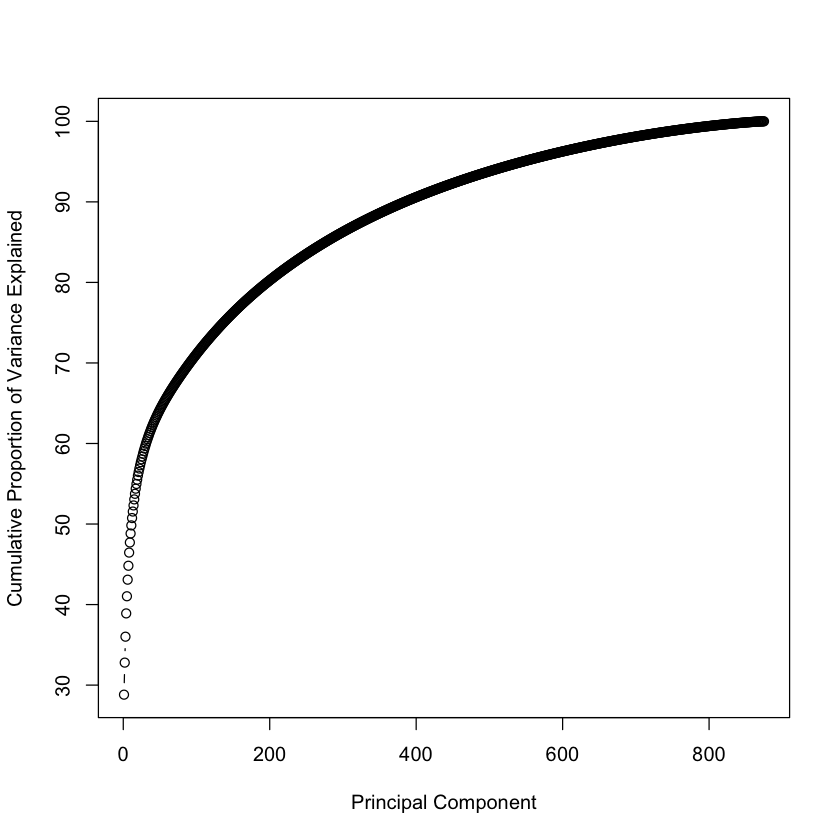

In [82]:
plot(CumulVariance,xlab = "Principal Component",
             ylab = "Cumulative Proportion of Variance Explained",
             type = "b")


**Analysis** : The plot above shows the cumulative variance explained by all PCs. To get close to 100% variance we would have to use all PCs. Hence we can settle for 90% variance explained. This is still a huge reduction from the 872 features we started with. Thus for the downstream model building tasks, we shall use the 384 principal components. To do that lets create the new training dataset and convert the testing dataset using these PCs. 

In [29]:
#Training
train_pca <- pca$x[,1:percVarBear]

# Convert string columns to integer vectors for test dataset
dataFull <- x_test
cols <- c("cp_type", "cp_time", "cp_dose")
for (var in cols){
    dataFull[,var] <- as.integer(factor(dataFull[,var]))
}
dataFull <- dataFull[,-1]
test_pca <- predict(pca, newdata = dataFull)[,1:percVarBear]

dim(train_pca)
dim(test_pca)

[1] 19051   384

[1] 4763  384

## Models
### Gradient Boosted Trees
The first model to start with is gradient boosted trees. The reason for choosing this method are manifold. 
1. Since this is a Kaggle dataset, and historically GBMs have been very successful in Kaggle competitions.
2. We also don't know a lot about the features in terms of normalization, and GBMs can work well despite improper data. Our features are also a mix of categorical type(cp_) and numerical type. For such scenarios again, GBMs don't make any assumptions and hence perform better.
3. And finally, like we studied in class, with ensemble trees we need not worry about bias-variance tradeoff issues. We can therefore get good performances without much hyperparameter tuning.

Like mentioned earlier, a separate model will be built for each of the 206 labels to simplify the task. Each model has 1000 trees and maximum depth of 4. Considering the large number of features these numbers seem reasonable. A not too small or not too big learning rate of 0.01 is chosen. We also include 5 fold cross-validation to prevent overfitting by the large number of trees. gbm's perf function allows us to determine the optimum number of trees using the cross-validation method. It monitors cross-validation error as a function of trees and returns the number when the error starts increasing again indicating overfitting after that point. That's the number of trees we will use to make predictions on the test dataset. 

Training model...
Training model...


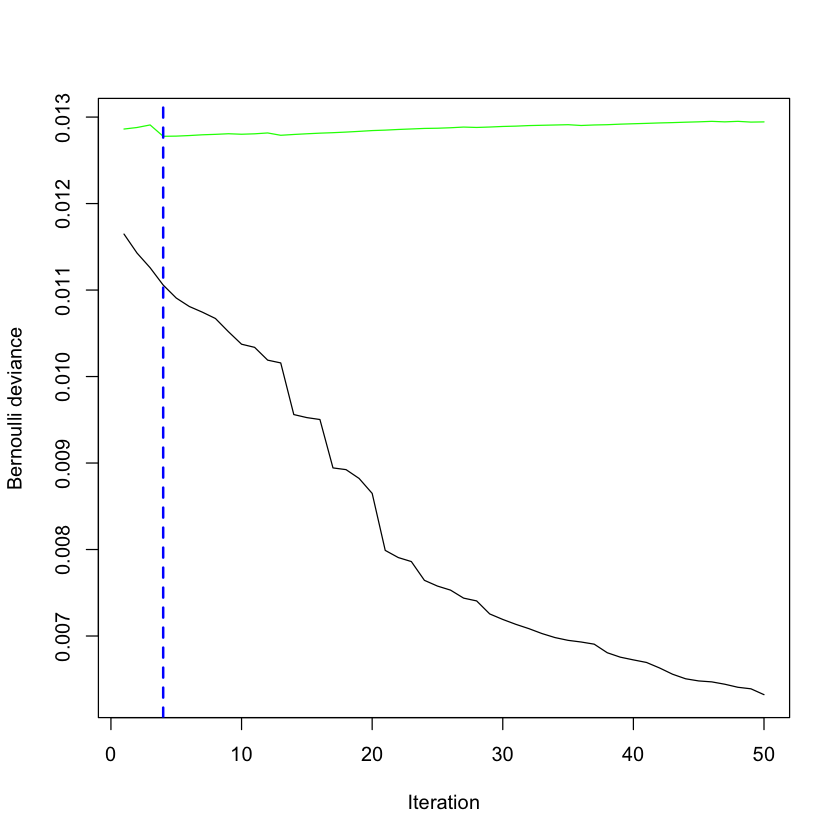

Training model...


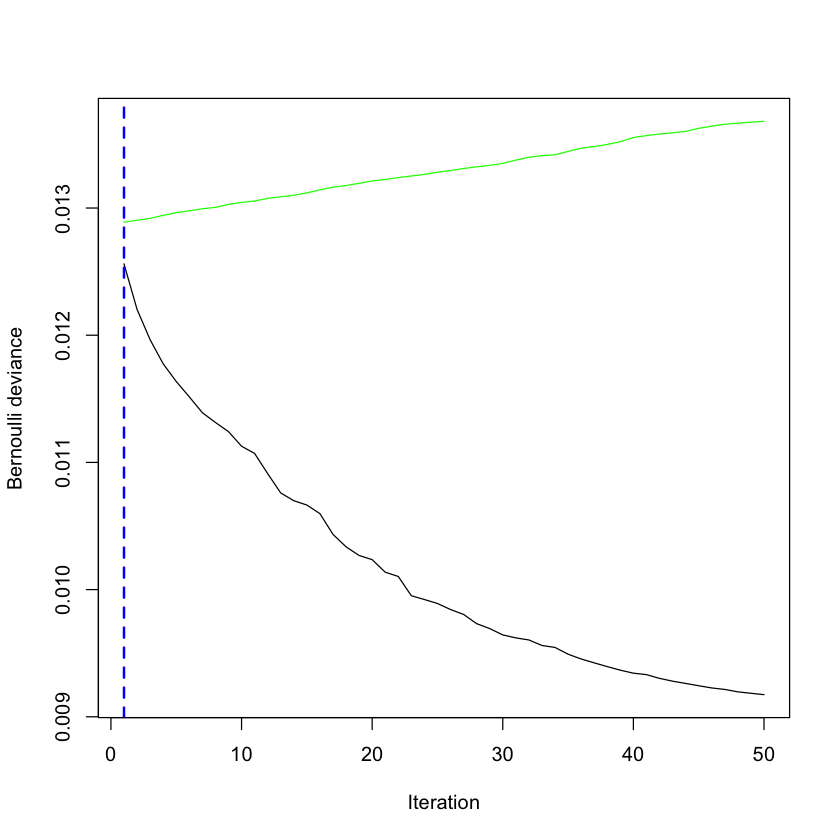

Training model...


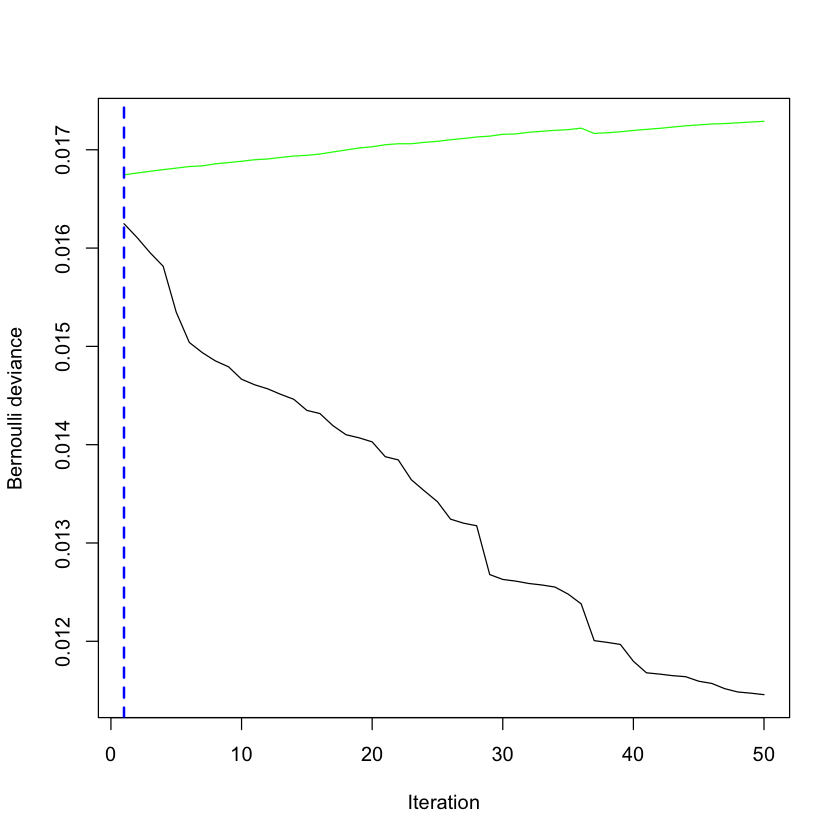

Training model...


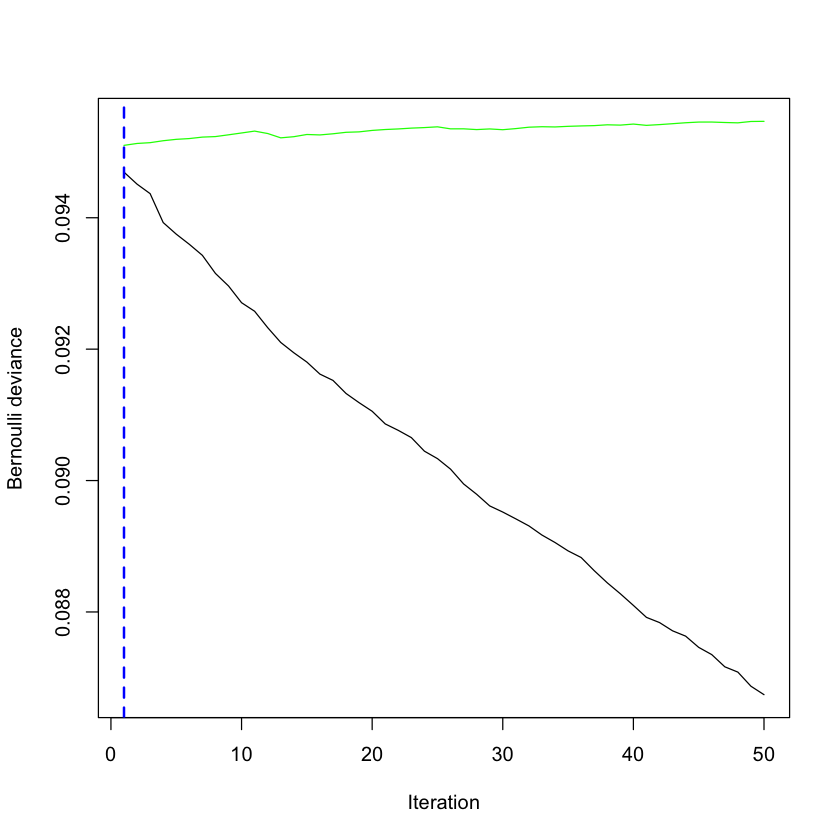

Training model...


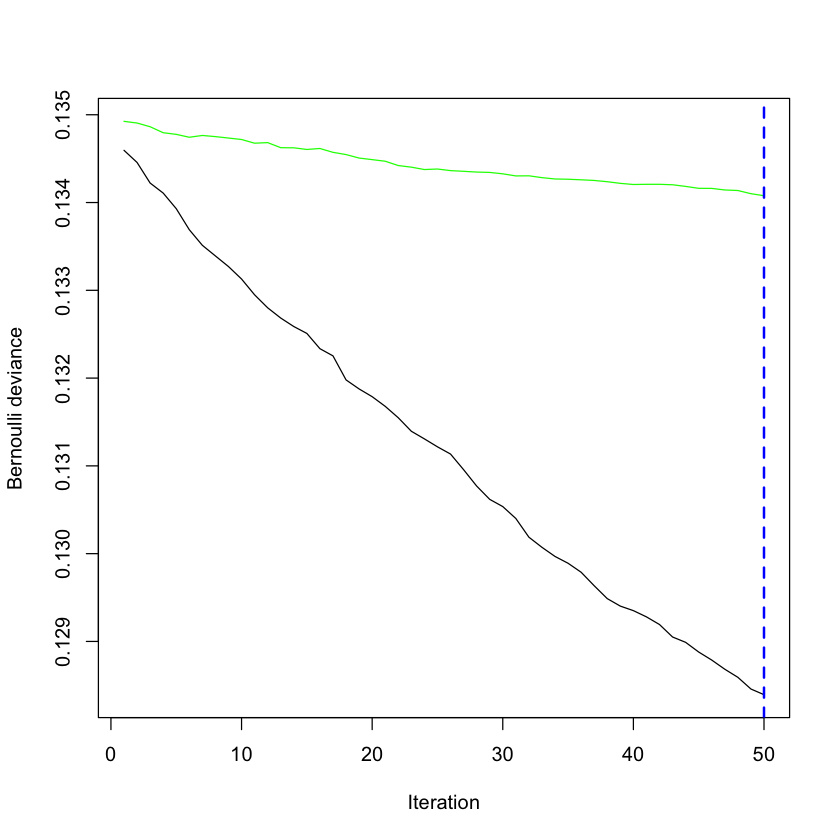

Training model...


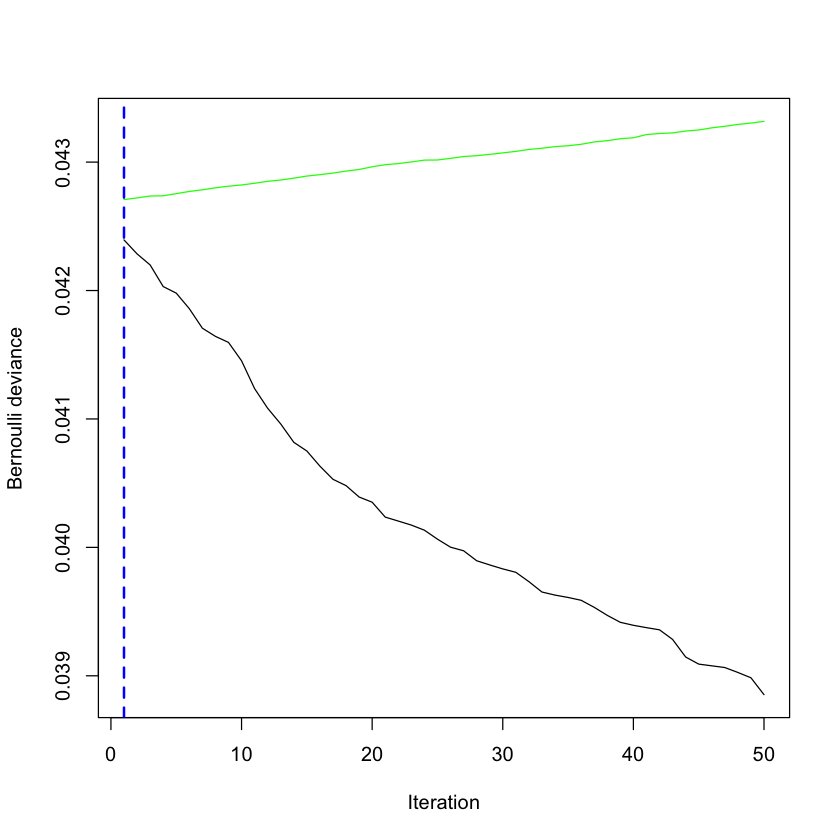

Training model...


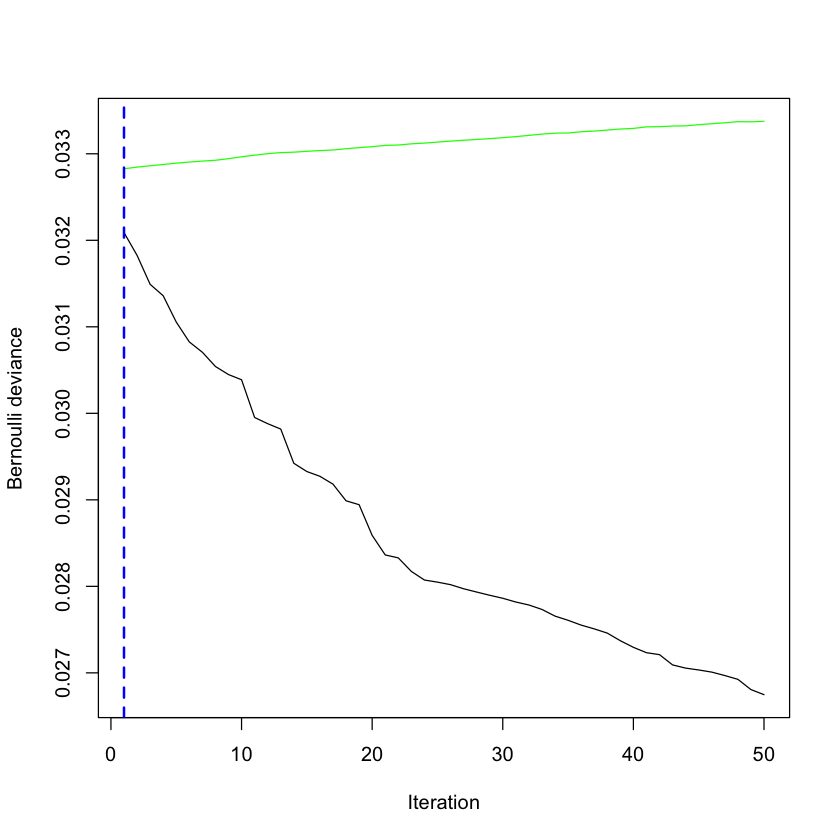

Training model...


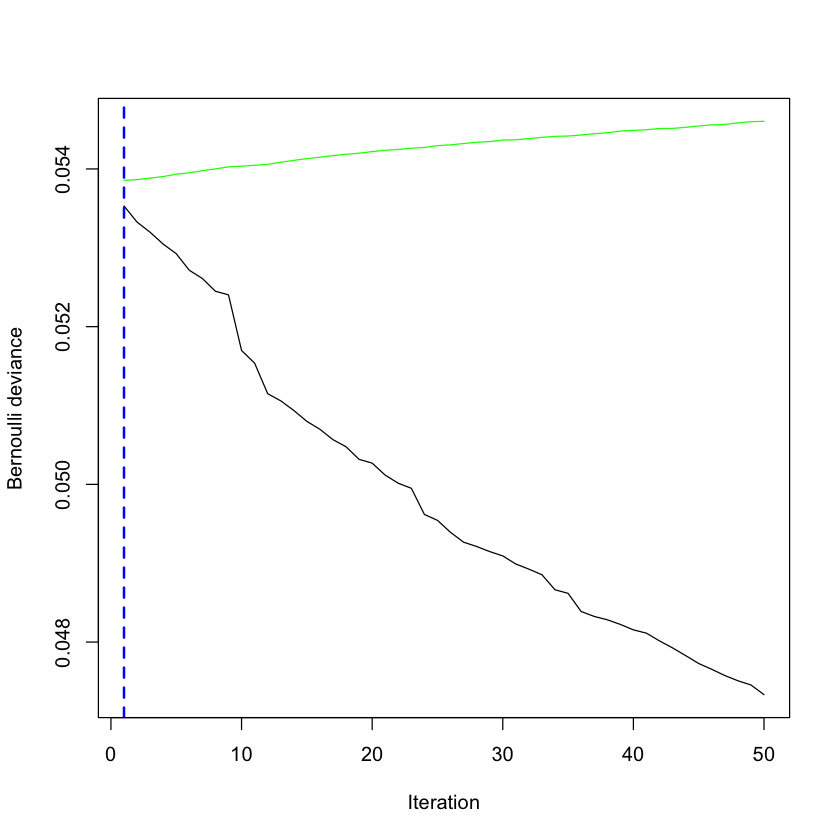

Training model...


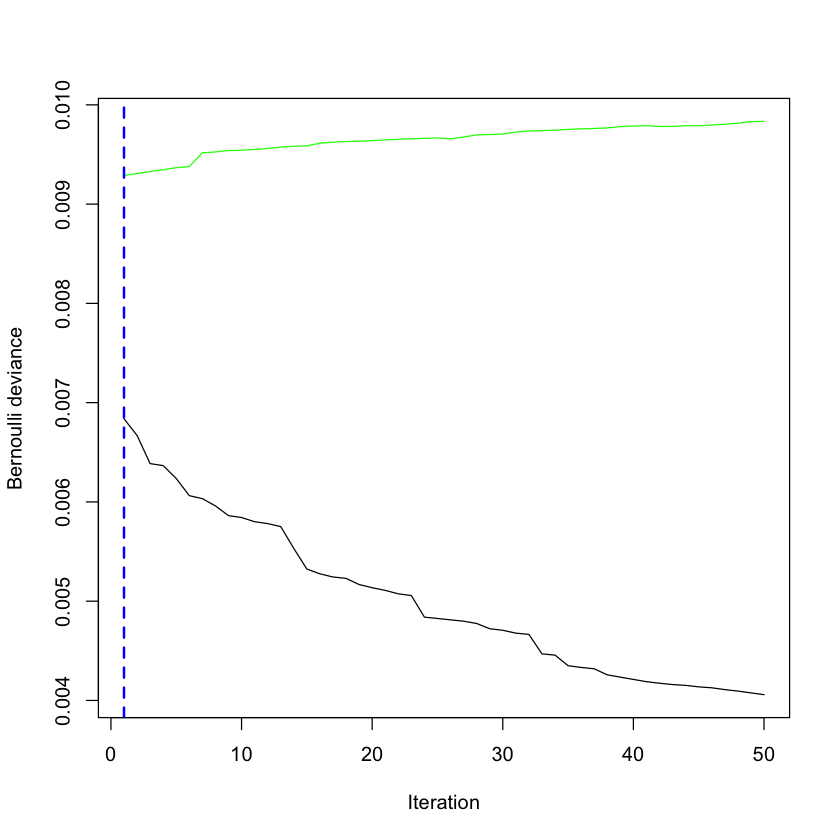

Training model...


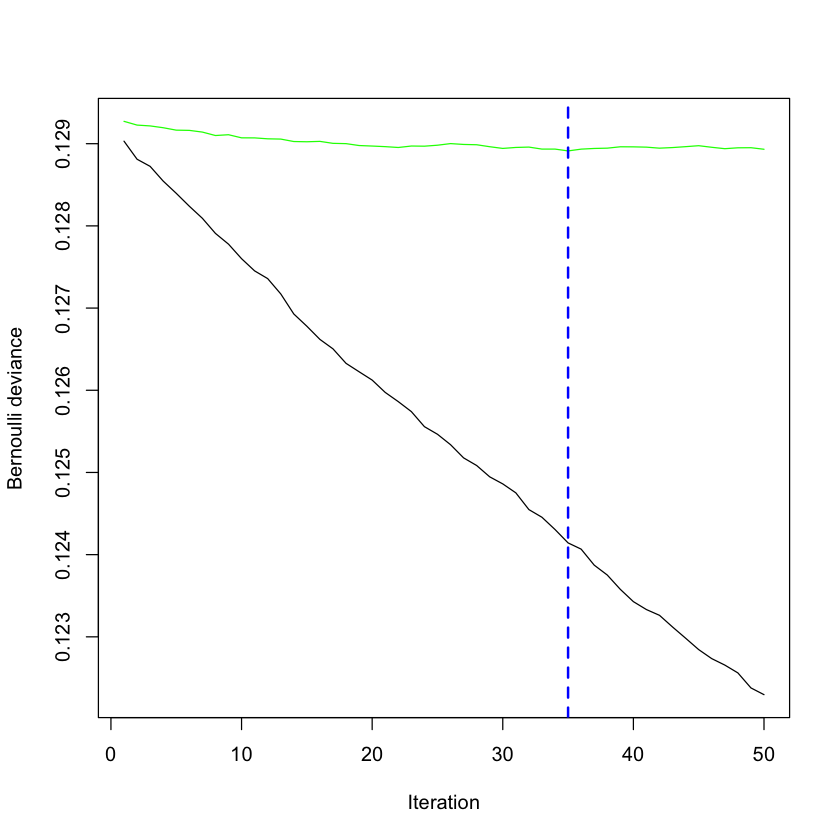

Training model...


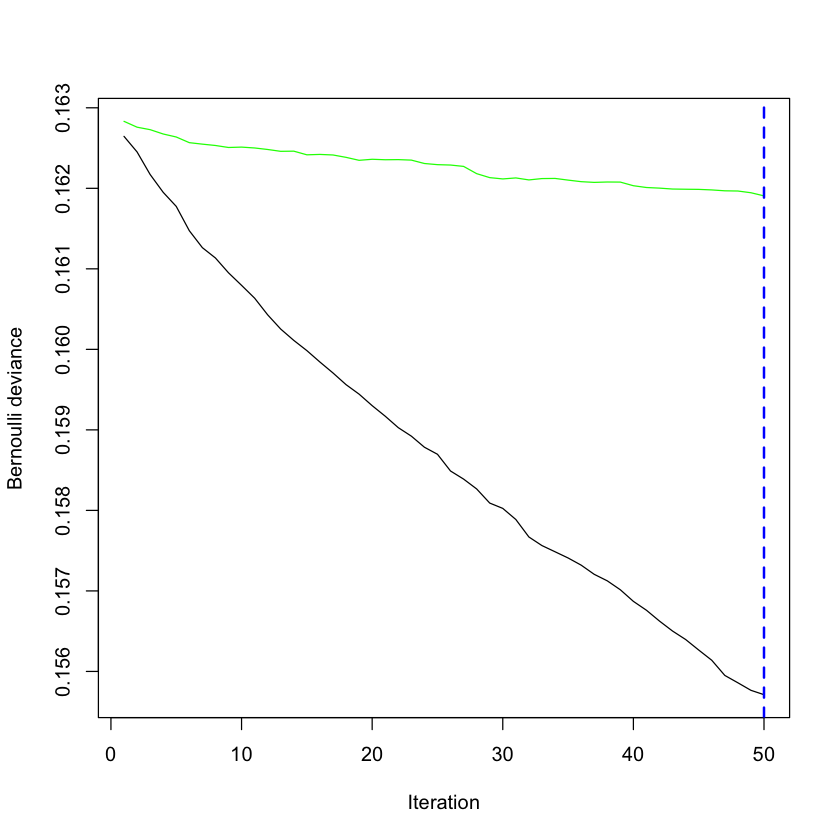

Training model...


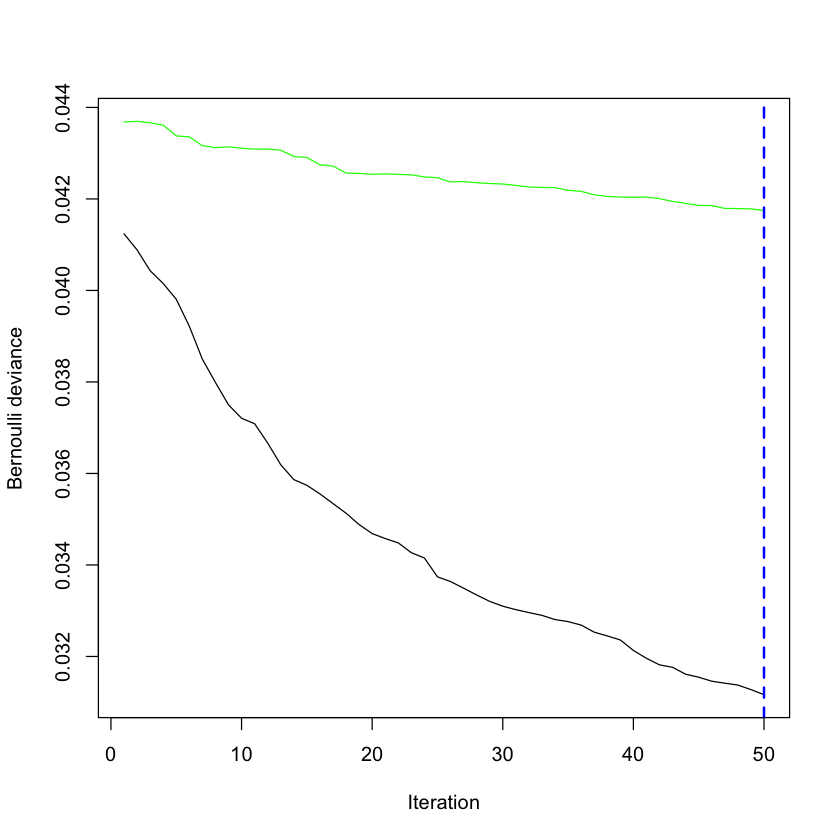

Training model...


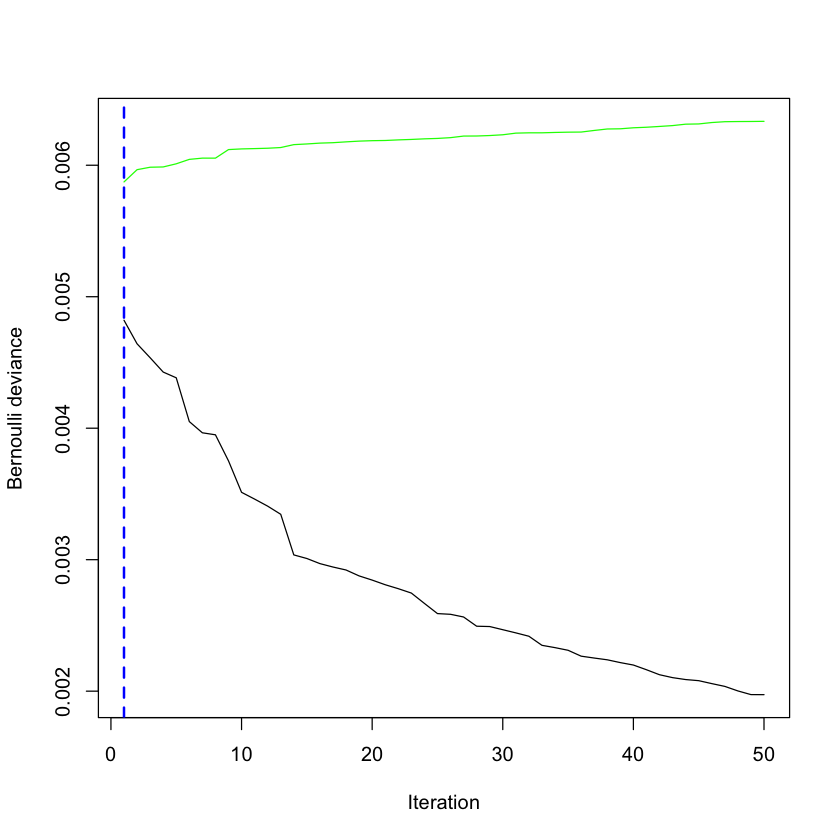

Training model...


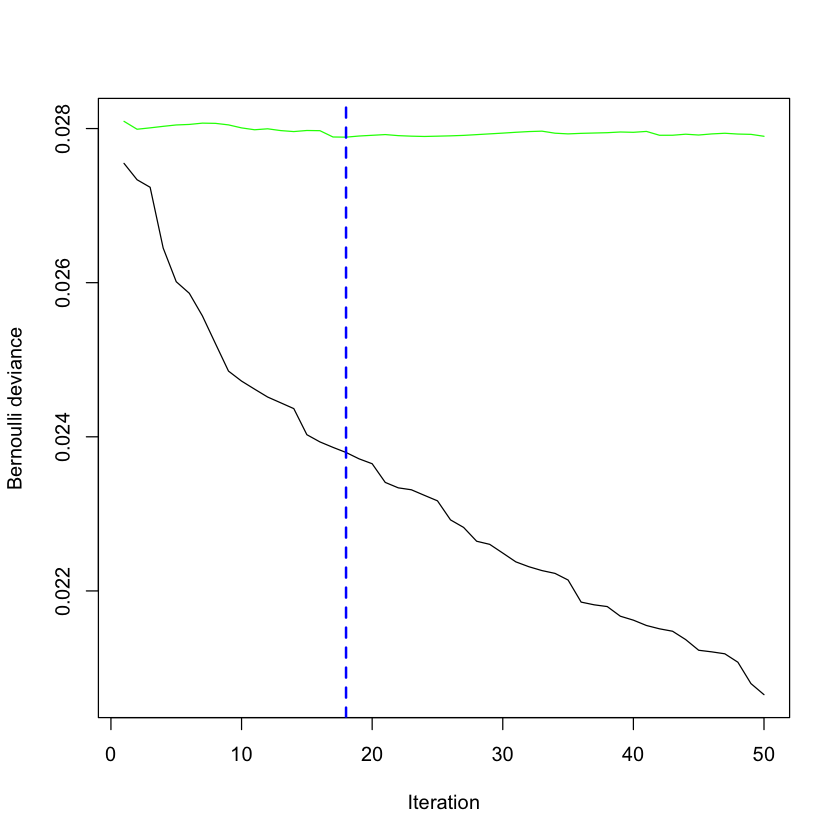

Training model...


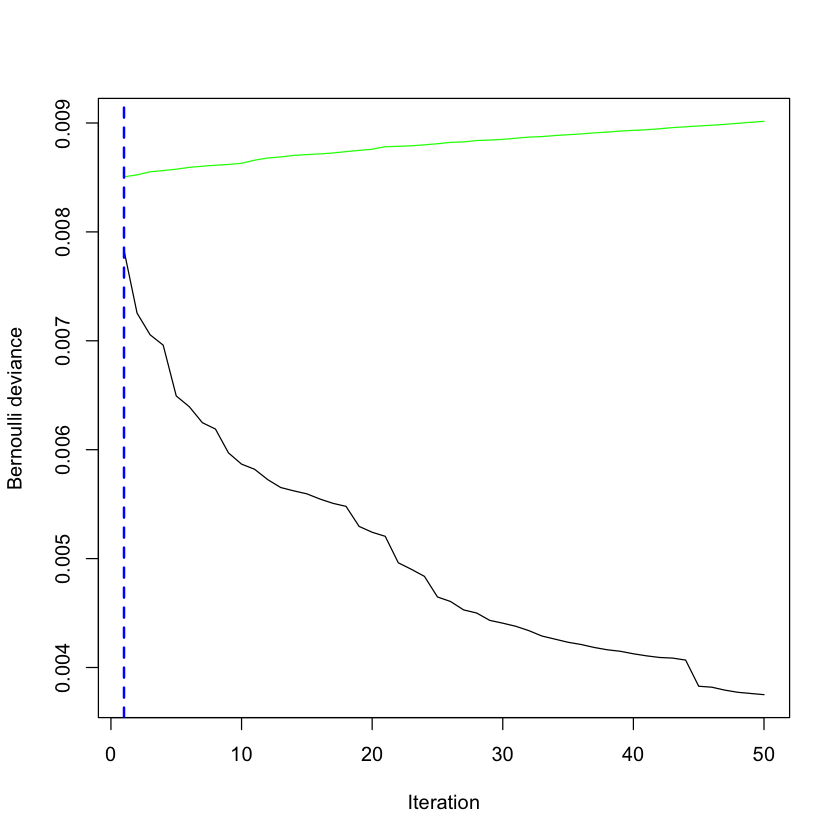

Training model...


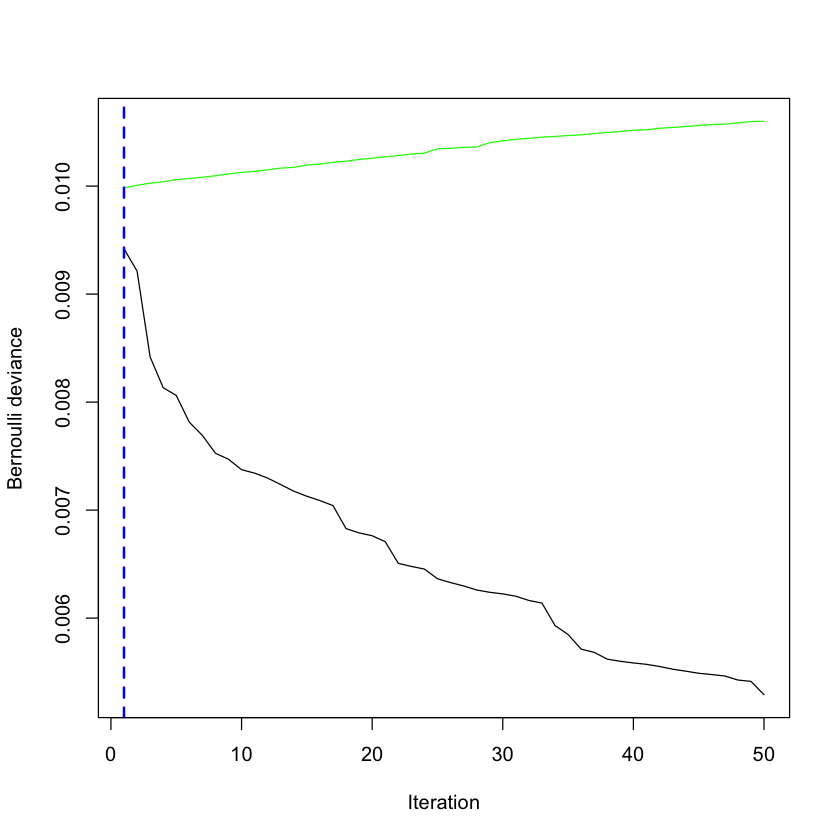

Training model...


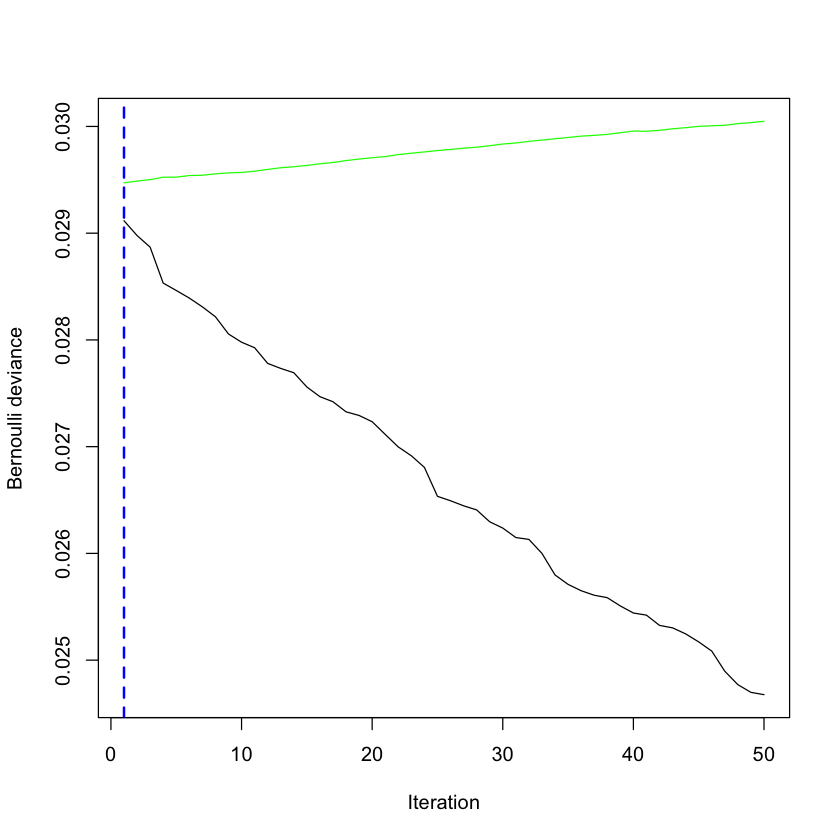

Training model...


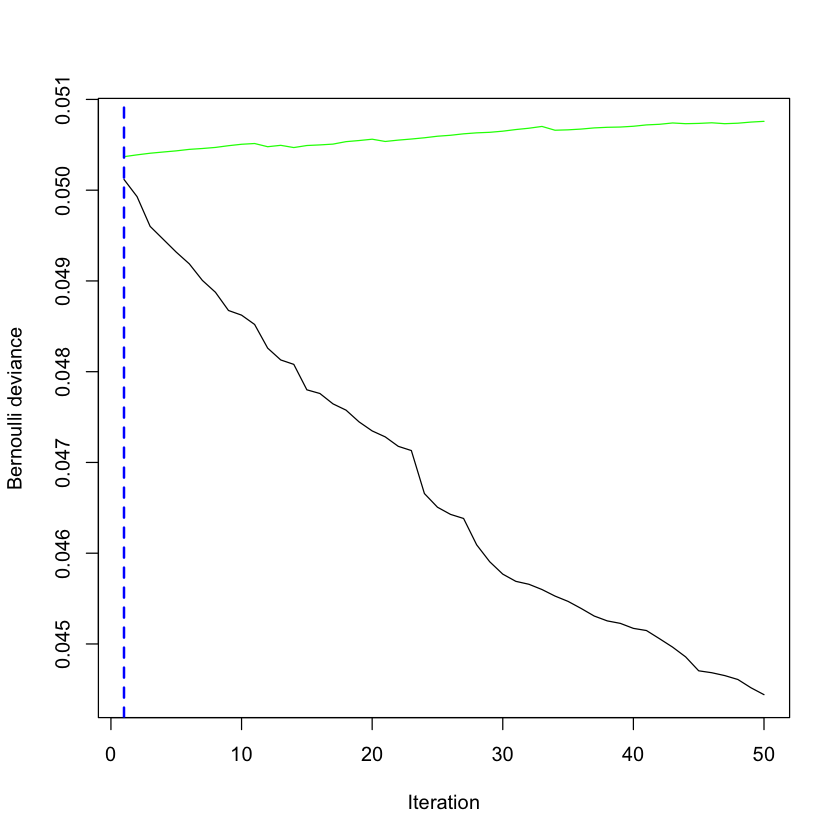

Training model...


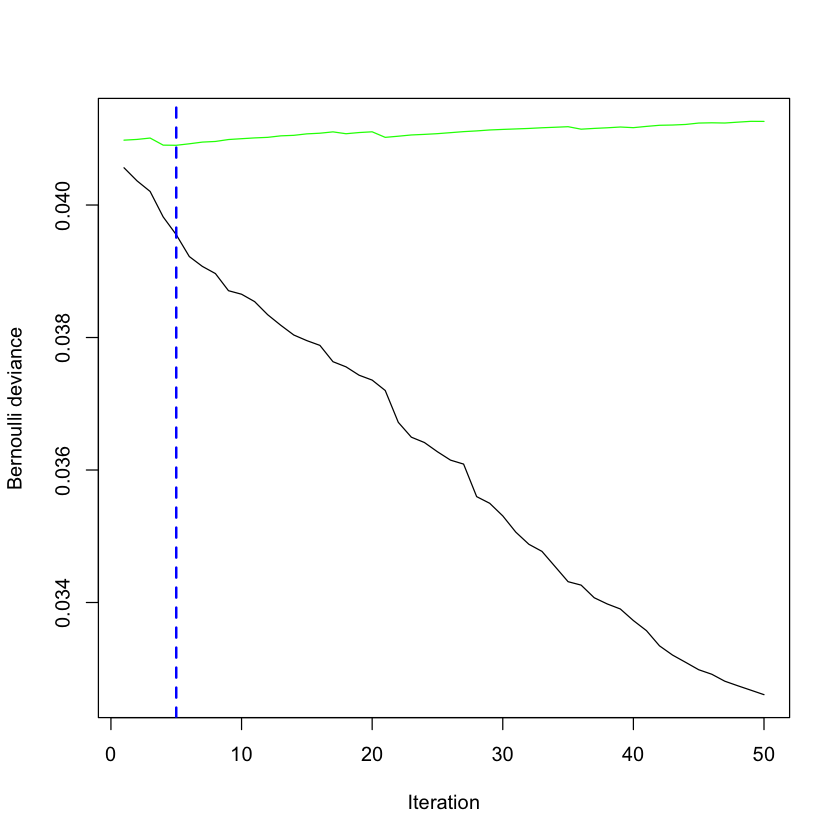

Training model...


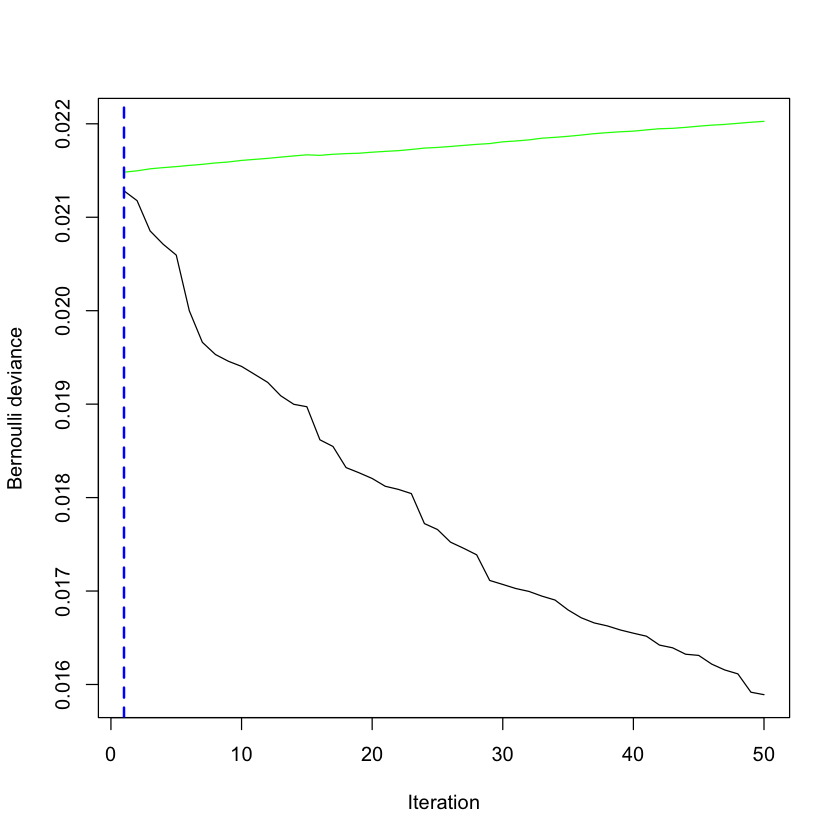

Training model...


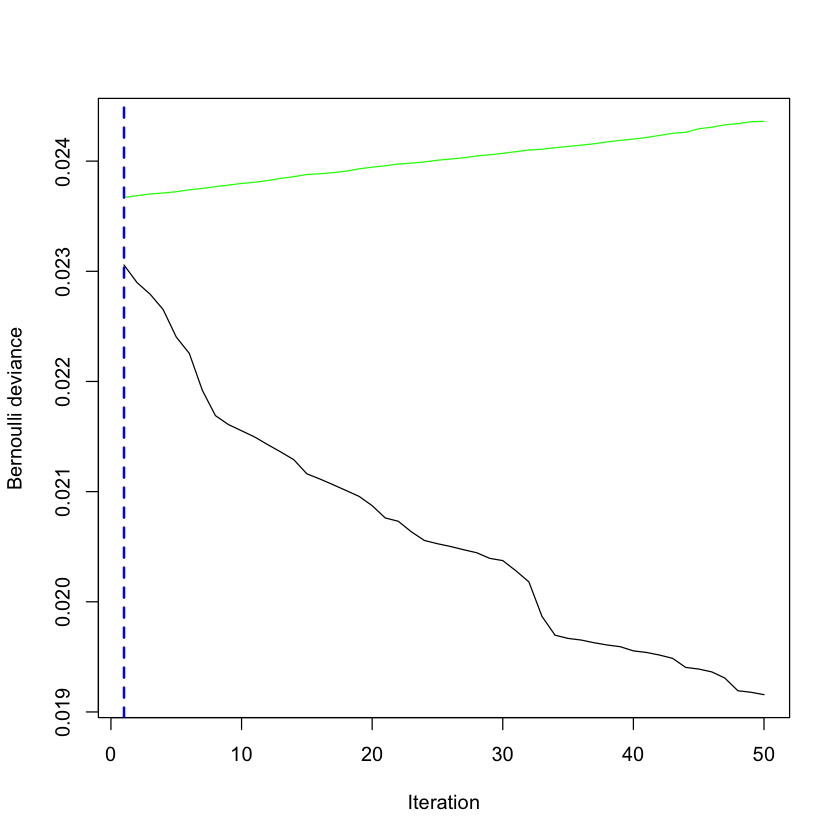

Training model...


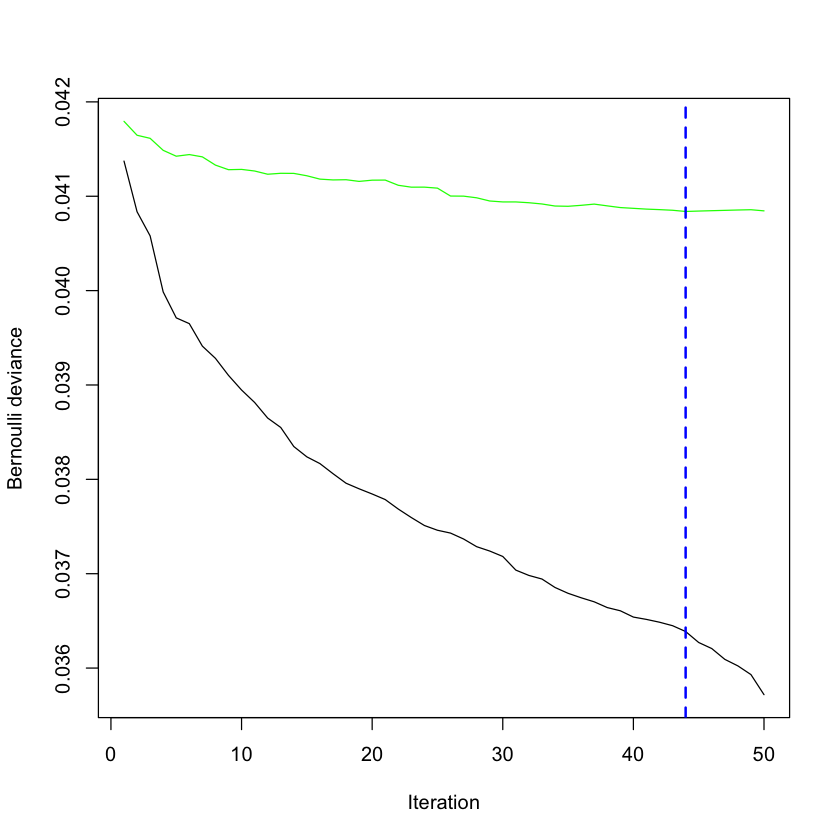

Training model...


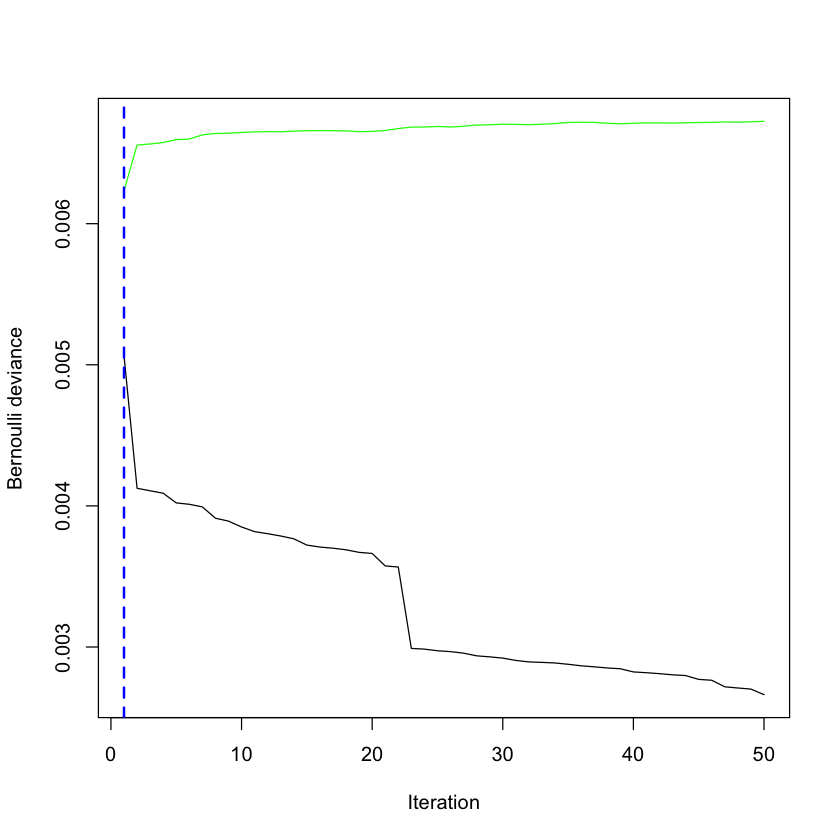

Training model...


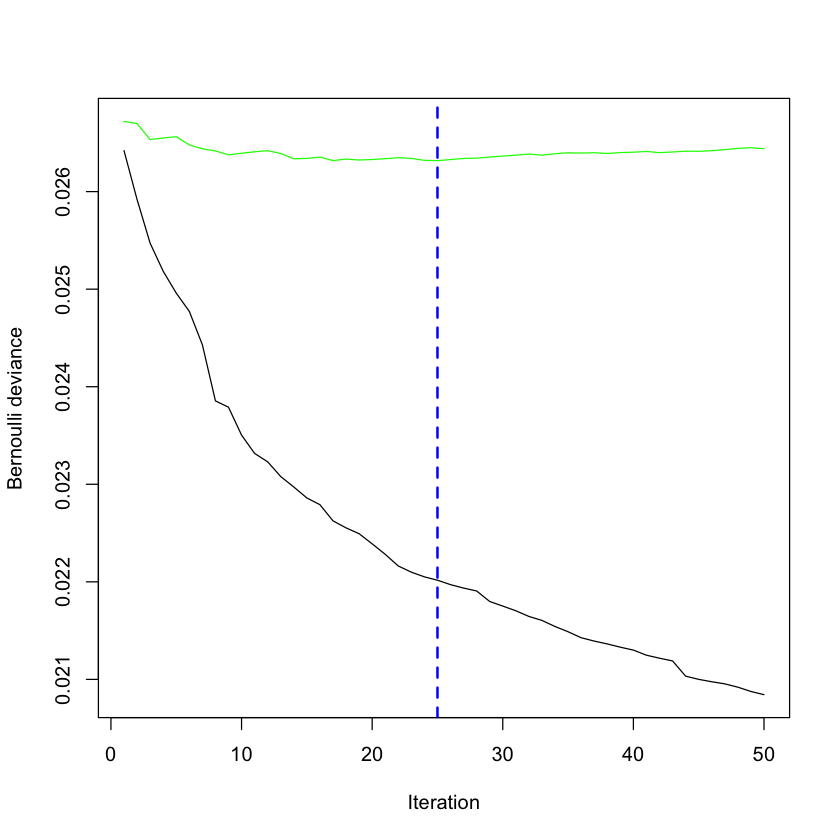

Training model...


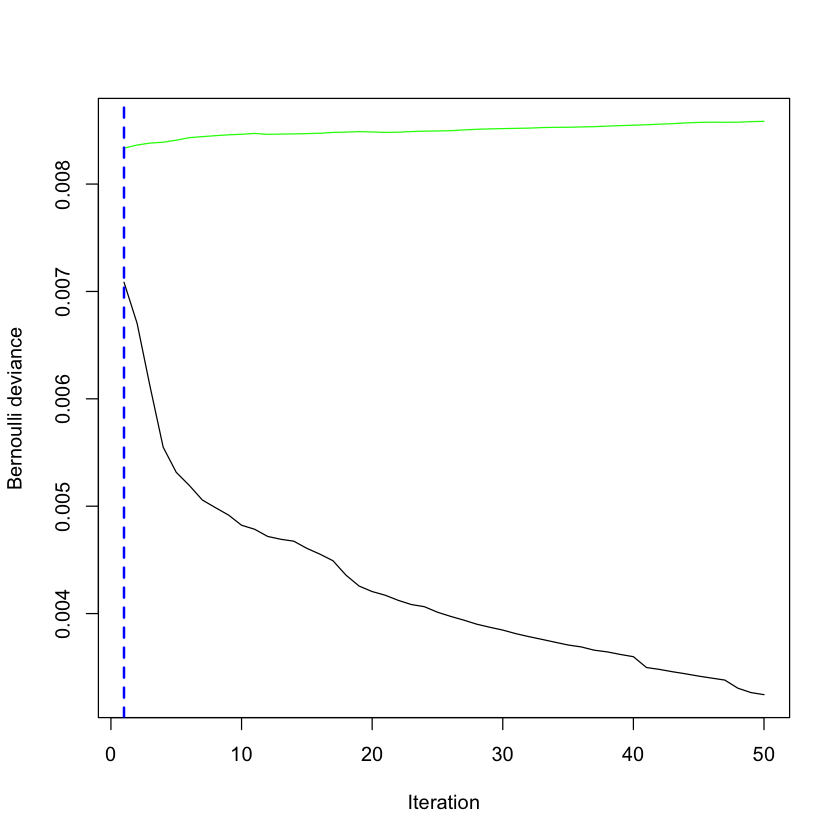

Training model...


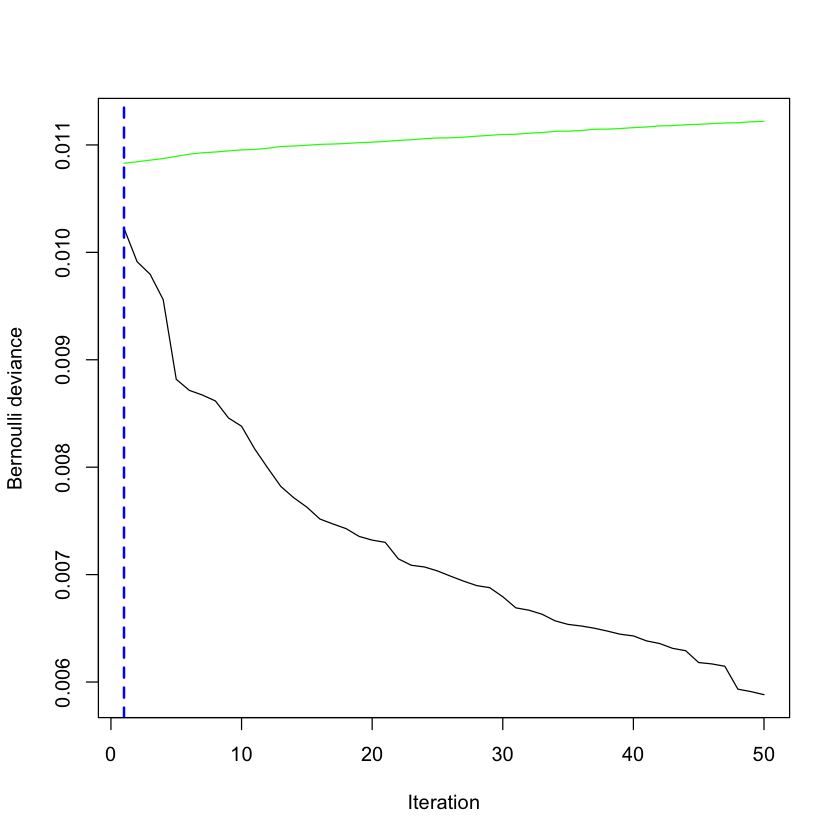

Training model...


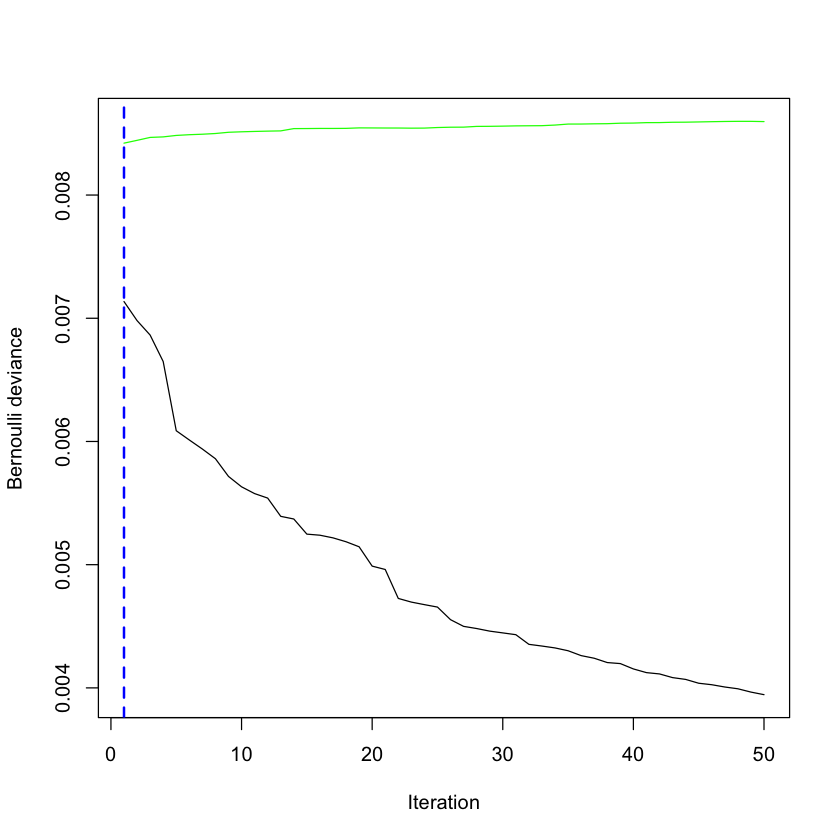

Training model...


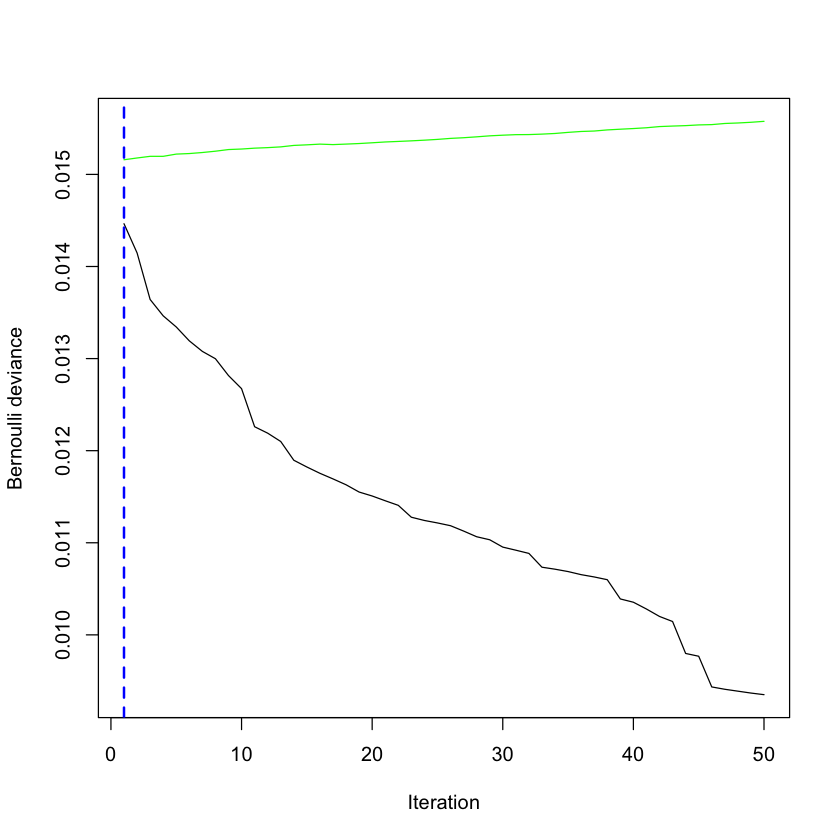

Training model...


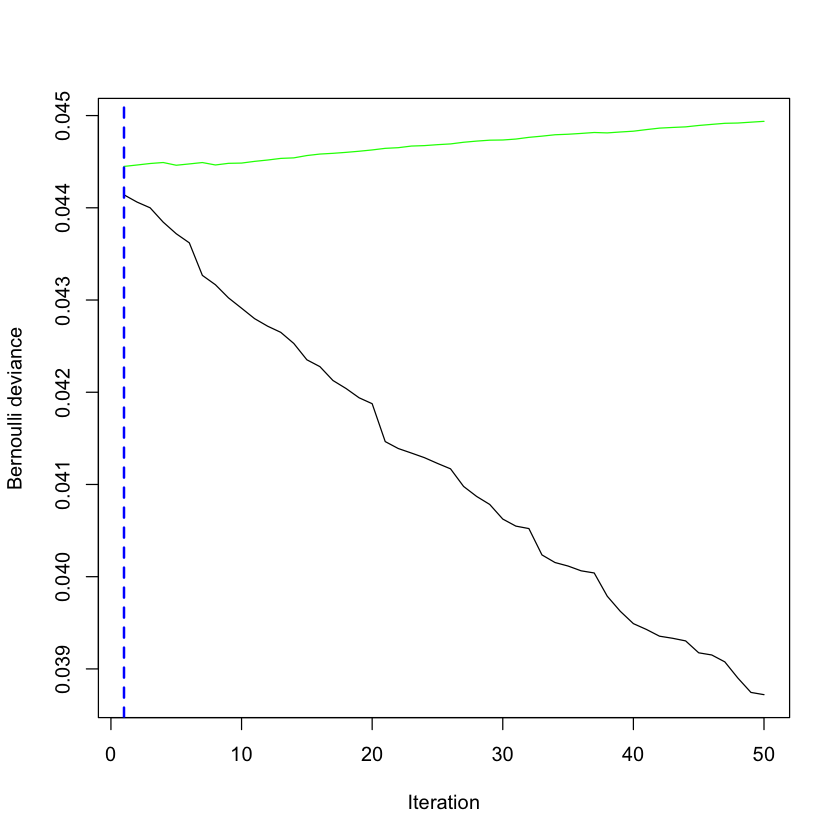

Training model...


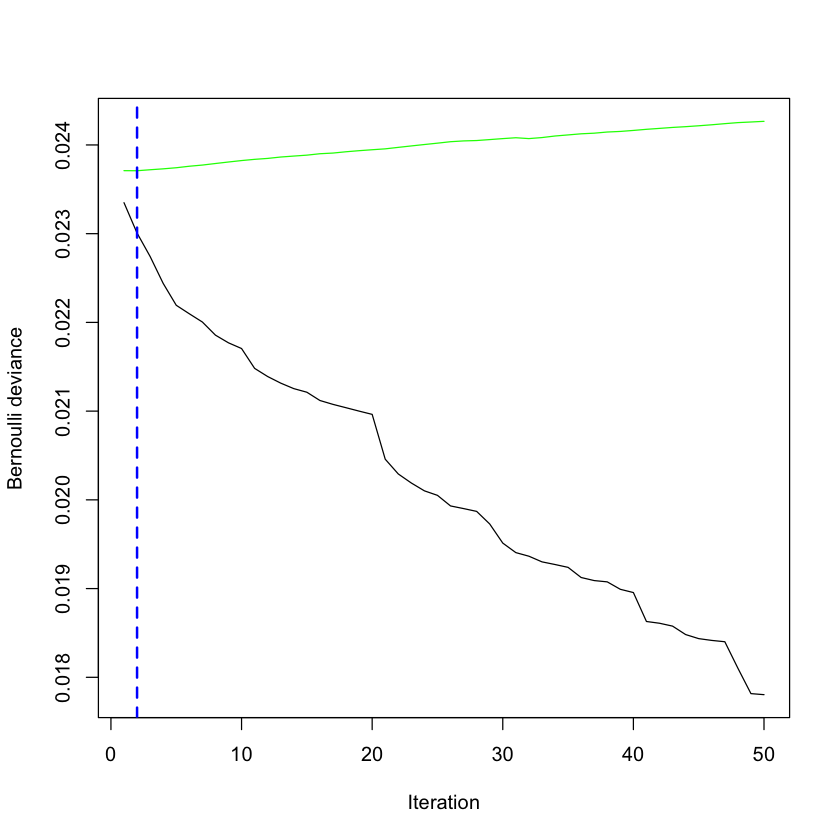

Training model...


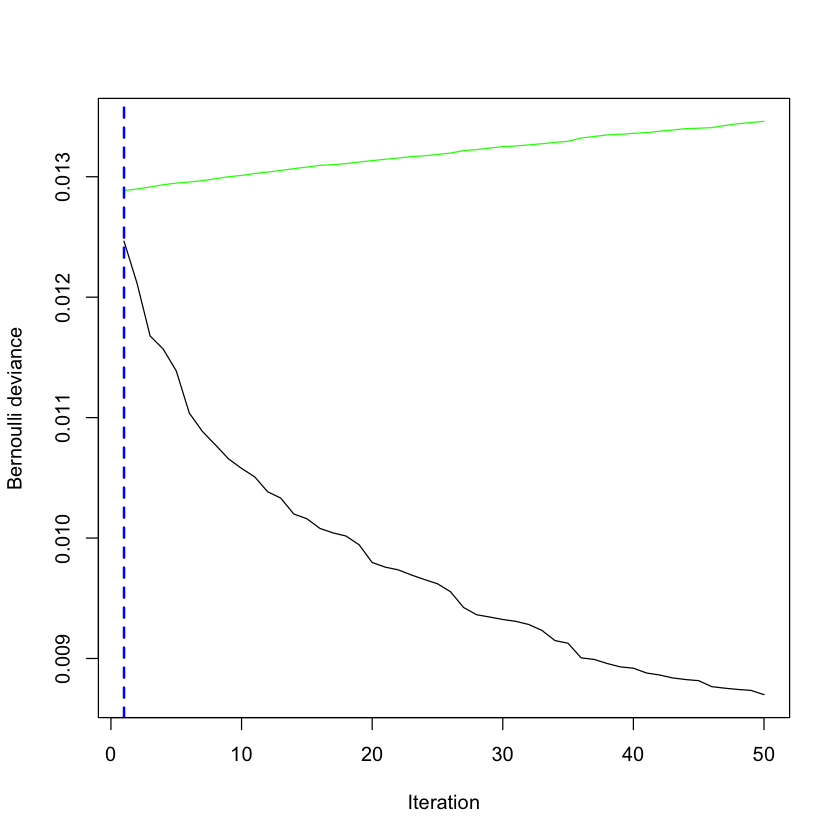

Training model...


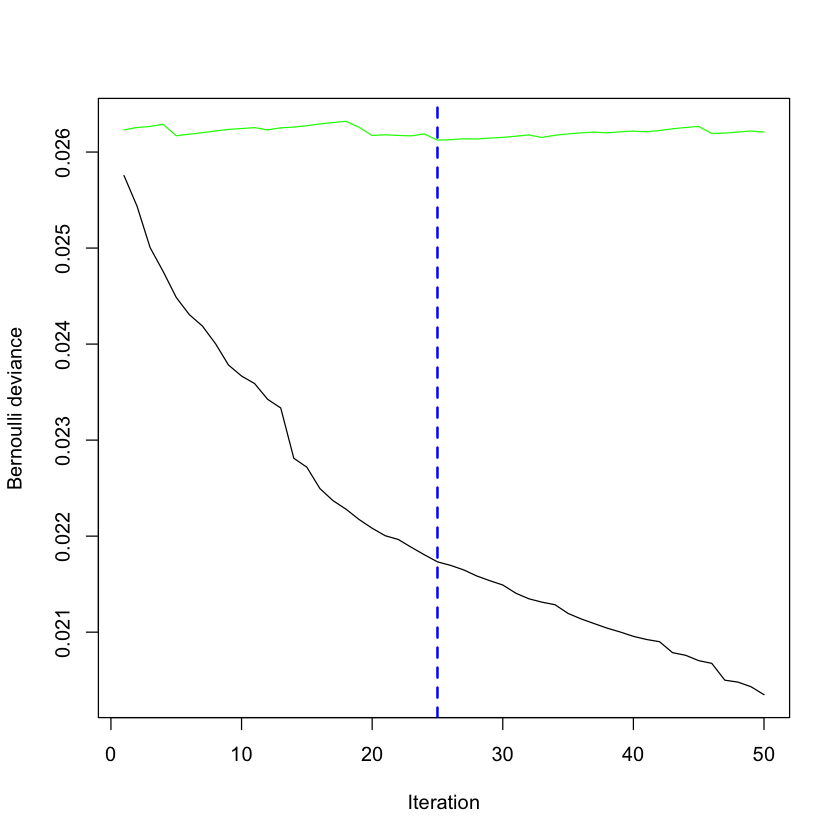

Training model...
Training model...


Using 50 trees...


Using 50 trees...


Using  trees...




In [ ]:
# install.packages("gbm")
library(gbm)

# to store predictions for each label
predictions <- matrix(ncol = ncol(labels)-1, nrow = nrow(test_pca))
        
input_x <- as.data.frame(train_pca)
test_x <- as.data.frame(test_pca)
for (i in 2:ncol(labels)){
    # training data for each label
    train_y <- y_train[,i]
    input_x$label <- train_y
    
    # testing data for each label
    test_y <- y_test[,i]
    test_x$label <- test_y
    
    cat("Training model...\n")
    
    # for reproducibility
    set.seed(123)
    # train GBM model
    gbm.fit <- gbm(
      formula = label ~ .,
      distribution = "bernoulli",
      data = input_x,
      n.trees = 50,
      interaction.depth = 4,
      shrinkage = 0.01,
      cv.folds = 5,
      n.cores = NULL, # will use all cores by default
      verbose = FALSE
      )  
    optimal_trees <- gbm.perf(gbm.fit, method = "cv")
    predictions[,i] <- predict(gbm.fit,n.trees=optimal_trees,newdata=test_x)
    
} 

**Analysis** : Even a 50 tree gbm model failed to run. However we do get a glimpse into the problems we faced allowing us to make improvements in a more directed fashion. The first issue was the long training time and dying of the kernel due to the large number of models and 50 trees for each model. Secondly, we can also draw some insights from the gbm.perf plots above for each label. The green line indicates testing error and the black line indicates training error. For most labels we can see that the testing error increases instead of decreasing. Since the dotted vertical line indicates where the testing error starts increasing, only 1 tree would be used for prediction for most labels. This completely defeats the purpose of creating 50 gradient boosted trees. Thus, gbm is probably a poor choice for this data and some feature engineering is required to get better results. However, given the extended runtime and computational limitations of building 206 tree based models, I decided to move away our focus from gradient boosted trees to other areas such as:
1. Reduce the amount of input data by removing all samples that had no labels assigned to them.
2. Move to simpler models such as logistic regression applied to each label separately

And so we will apply these both.

### Logistic Regression
To remove samples with no labels we can at first directly remove all control samples. Next for trt_cp samples we can find all rows that have greater than 0 labels. We can convert the string columns to integers before PCA step as well.

In [3]:
# removing all rows that have no labels from features and labels
suppressMessages(library(tidyverse))

actual = features[features$cp_type=='trt_cp',]
dim(features)
filtered_features <- features[rowSums(labels[labels$sig_id %in% actual$sig_id,][,-1])>0,] %>%
  dplyr::select(-cp_type)  #getting rid of cp_type column bc there is only 1 type
dim(filtered_features)
filtered_labels <- labels[rowSums(labels[labels$sig_id %in% actual$sig_id,][,-1])>0,] 
dim(filtered_labels)

# convert cp_time,cp_dose to integers
cols <- c("cp_time", "cp_dose")
for (var in cols){
    filtered_features[,var] <- as.integer(factor(filtered_features[,var]))
}
# removing sig_id from features for PCA processing
filtered_features <- filtered_features[,-1]
head(filtered_features)

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”
Warning message:
“package ‘readr’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
Warning message:
“package ‘dplyr’ was built under R version 3.6.2”
Warning message:
“package ‘forcats’ was built under R version 3.6.2”


[1] 23814   876

[1] 15678   875

[1] 15678   207

,cp_time,cp_dose,g.0,g.1,g.2,g.3,g.4,g.5,g.6,g.7,⋯,c.90,c.91,c.92,c.93,c.94,c.95,c.96,c.97,c.98,c.99
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,⋯,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
3,2,1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,⋯,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
5,3,2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,⋯,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
6,1,1,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,⋯,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990
8,2,1,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,⋯,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
10,2,2,-0.0630,0.2564,-0.5279,-0.2541,-0.0182,-1.5370,-0.2180,-0.0430,⋯,0.2201,0.5601,-0.3501,-1.4070,-0.1717,-1.1160,-0.8745,-0.2716,0.0189,-2.0000


**Analysis** : 
We have managed to reduce from 23814 to 15678 rows. We can again divide this data into train and test sets and also perform PCA on the new sets. This time we shall create a separate train-test split for each label using a method called CreateDataPartition. It is better than random sampling because it internally tries to ensure that the train and test samples are somewhat similar. Since each label will have a different distribution, this would ensure a fair training and test set for each label. Also note that if a label is assigned to fewer than 5 samples, CreateDataPartition is not able to ensure an equal distribution of positive samples in the train and test set. This causes logistic regression to crash. That's why we have filtered such labels out(mentioned on the top of the output). Since training and testing set change for each label, we need to run PCA again as well.

Here, we have used 'tidymodels' packages to define regularized logistic regression instead of the default 'glmnet' package. This is because 'parsnip', a tidymodel package makes it very easy to specify data without worrying about the matrix format required by 'glmnet'. Note that parsnip is just a wrapper around glmnet and internally uses glmnet for its method. Also here I have used regularized logistic regression because without regularization I observed a warning message like: <img src="my_data/error.png" width="400" > <br>This error means that when logistic regression perfectly classifies the 0's and 1's there are situations when the coefficients get too big. To control these coefficients and preventing overfitting, regularization is used. For each label the regularization parameter is chosen by using the *grid_max_entropy* function which randomly samples values from the parameter space. Other *tidymodels* packages used include *recipe* which allows for easier specification of data processing and *workflows* which allows us to bundle all the processing and model building steps into a workflow which can then be run. We could have tried running for all 10 values sampled, but that would have increased the run time even further. The function below makes predictions on the test set and returns the accuracy. 

<!-- Because 'glm' method doesn't have a way to specify cross-validation we shall use the 'train' method under caret package. This method uses cross-validation create a more generalized model and get better performance results. We again try with 5-fold cross-validation.  -->


In [148]:
# install.packages("workflows")
# install.packages('dials')

library(recipes)
library(parsnip)
library(workflows)
library(dials)

num_pos <- filtered_labels  %>% select(-sig_id) %>%
  summarize(across(everything(), sum)) %>%
  pivot_longer(cols = everything(),
               names_to = "var",
               values_to = "num_pos")

filtered_labels <- filtered_labels %>% mutate(across(c(2:207), as_factor)) 

# we want to filter out labels that are assigned to fewer than 5 samples
low_counts <- num_pos %>%
  filter(num_pos <= 4) %>%
  pull("var")

low_counts

calc_acc = function(actual, predicted) {
  mean(actual == predicted)
}

mod_fits <- function(out) {
    set.seed(0408)
    cat(paste("Training for label :", out,"\n"))
    idx = createDataPartition(filtered_labels[,out], p = 0.8, list = FALSE)
    trn = filtered_features[idx, ]
    tst = filtered_features[-idx, ]
    
    # PCA on train
    pca <- prcomp(trn, center = TRUE, scale. = TRUE)
    minComp <- get90varComp(pca)
    trn <- as.data.frame(pca$x[,1:minComp])
    tst <- as.data.frame(predict(pca, newdata = tst)[,1:minComp])
    
    penalty <- grid_max_entropy(penalty(), size = 10)[[1,1]]
  
    # Filter out labels with fewer than 5 samples
    if(out %in% low_counts) {
        return(0)
    } else {
        # Create model and input data format
        rec <- recipe(~ ., data = trn %>% bind_cols(filtered_labels[idx,] %>% select(all_of(out)))) %>%
        update_role(all_of(out), new_role = "outcome") 
        logreg_spec <- logistic_reg(penalty = penalty, mixture = 1) %>% set_engine("glmnet")
        
        # Combine into workflow and fit the model
        wf <- workflow() %>% add_recipe(rec) %>% add_model(logreg_spec)
        set.seed(0408)
        logreg_fit <- wf %>% fit(trn %>% bind_cols(filtered_labels[idx,]))

        # Get predictions and accuracy
        preds <- predict(logreg_fit, new_data = tst) 
        return(calc_acc(actual = factor(filtered_labels[-idx, out]),
         predicted = preds[, ".pred_class", drop = TRUE]))
    }
}

#predicting for all
yy <- map(names(filtered_labels[,2:ncol(labels)]), ~mod_fits(.x))


[1] "aldehyde_dehydrogenase_inhibitor"          
 [2] "atm_kinase_inhibitor"                      
 [3] "atp.sensitive_potassium_channel_antagonist"
 [4] "bacterial_membrane_integrity_inhibitor"    
 [5] "calcineurin_inhibitor"                     
 [6] "coagulation_factor_inhibitor"              
 [7] "erbb2_inhibitor"                           
 [8] "leukotriene_inhibitor"                     
 [9] "nicotinic_receptor_agonist"                
[10] "retinoid_receptor_antagonist"              
[11] "steroid"                                   
[12] "tropomyosin_receptor_kinase_inhibitor"     
[13] "ubiquitin_specific_protease_inhibitor"

Training for label : X5.alpha_reductase_inhibitor 
Training for label : X11.beta.hsd1_inhibitor 
Training for label : acat_inhibitor 
Training for label : acetylcholine_receptor_agonist 
Training for label : acetylcholine_receptor_antagonist 
Training for label : acetylcholinesterase_inhibitor 
Training for label : adenosine_receptor_agonist 
Training for label : adenosine_receptor_antagonist 
Training for label : adenylyl_cyclase_activator 
Training for label : adrenergic_receptor_agonist 
Training for label : adrenergic_receptor_antagonist 
Training for label : akt_inhibitor 
Training for label : aldehyde_dehydrogenase_inhibitor 
Training for label : alk_inhibitor 
Training for label : ampk_activator 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : analgesic 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : androgen_receptor_agonist 
Training for label : androgen_receptor_antagonist 
Training for label : anesthetic_._local 
Training for label : angiogenesis_inhibitor 
Training for label : angiotensin_receptor_antagonist 
Training for label : anti.inflammatory 
Training for label : antiarrhythmic 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : antibiotic 
Training for label : anticonvulsant 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : antifungal 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : antihistamine 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : antimalarial 
Training for label : antioxidant 
Training for label : antiprotozoal 
Training for label : antiviral 
Training for label : apoptosis_stimulant 
Training for label : aromatase_inhibitor 
Training for label : atm_kinase_inhibitor 
Training for label : atp.sensitive_potassium_channel_antagonist 
Training for label : atp_synthase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : atpase_inhibitor 
Training for label : atr_kinase_inhibitor 
Training for label : aurora_kinase_inhibitor 
Training for label : autotaxin_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : bacterial_30s_ribosomal_subunit_inhibitor 
Training for label : bacterial_50s_ribosomal_subunit_inhibitor 
Training for label : bacterial_antifolate 
Training for label : bacterial_cell_wall_synthesis_inhibitor 
Training for label : bacterial_dna_gyrase_inhibitor 
Training for label : bacterial_dna_inhibitor 
Training for label : bacterial_membrane_integrity_inhibitor 
Training for label : bcl_inhibitor 
Training for label : bcr.abl_inhibitor 
Training for label : benzodiazepine_receptor_agonist 
Training for label : beta_amyloid_inhibitor 
Training for label : bromodomain_inhibitor 
Training for label : btk_inhibitor 
Training for label : calcineurin_inhibitor 
Training for label : calcium_channel_blocker 
Training for label : cannabinoid_receptor_agonist 
Training for label : cannabinoid_receptor_antagonist 
Training for label : carbonic_anhydrase_inhibitor 
Training for label : casein_kinase_inhibitor 
Training for label : caspase_activator 
Training for label :

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : cc_chemokine_receptor_antagonist 
Training for label : cck_receptor_antagonist 
Training for label : cdk_inhibitor 
Training for label : chelating_agent 
Training for label : chk_inhibitor 
Training for label : chloride_channel_blocker 
Training for label : cholesterol_inhibitor 
Training for label : cholinergic_receptor_antagonist 
Training for label : coagulation_factor_inhibitor 
Training for label : corticosteroid_agonist 
Training for label : cyclooxygenase_inhibitor 
Training for label : cytochrome_p450_inhibitor 


Warning message:
“from glmnet Fortran code (error code -98); Convergence for 98th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”


Training for label : dihydrofolate_reductase_inhibitor 
Training for label : dipeptidyl_peptidase_inhibitor 
Training for label : diuretic 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : dna_alkylating_agent 
Training for label : dna_inhibitor 
Training for label : dopamine_receptor_agonist 
Training for label : dopamine_receptor_antagonist 
Training for label : egfr_inhibitor 
Training for label : elastase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : erbb2_inhibitor 


Warning message in createDataPartition(filtered_labels[, out], p = 0.8, list = FALSE):
“Some classes have a single record ( 1 ) and these will be selected for the sample”


Training for label : estrogen_receptor_agonist 
Training for label : estrogen_receptor_antagonist 
Training for label : faah_inhibitor 
Training for label : farnesyltransferase_inhibitor 
Training for label : fatty_acid_receptor_agonist 
Training for label : fgfr_inhibitor 
Training for label : flt3_inhibitor 
Training for label : focal_adhesion_kinase_inhibitor 
Training for label : free_radical_scavenger 
Training for label : fungal_squalene_epoxidase_inhibitor 
Training for label : gaba_receptor_agonist 
Training for label : gaba_receptor_antagonist 
Training for label : gamma_secretase_inhibitor 
Training for label : glucocorticoid_receptor_agonist 
Training for label : glutamate_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : glutamate_receptor_agonist 
Training for label : glutamate_receptor_antagonist 
Training for label : gonadotropin_receptor_agonist 
Training for label : gsk_inhibitor 
Training for label : hcv_inhibitor 
Training for label : hdac_inhibitor 
Training for label : histamine_receptor_agonist 
Training for label : histamine_receptor_antagonist 
Training for label : histone_lysine_demethylase_inhibitor 
Training for label : histone_lysine_methyltransferase_inhibitor 
Training for label : hiv_inhibitor 
Training for label : hmgcr_inhibitor 
Training for label : hsp_inhibitor 
Training for label : igf.1_inhibitor 
Training for label : ikk_inhibitor 
Training for label : imidazoline_receptor_agonist 
Training for label : immunosuppressant 
Training for label : insulin_secretagogue 
Training for label : insulin_sensitizer 
Training for label : integrin_inhibitor 
Training for label : jak_inhibitor 
Training for label : kit_inhibitor 
Training for label : laxative 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : leukotriene_inhibitor 
Training for label : leukotriene_receptor_antagonist 
Training for label : lipase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : lipoxygenase_inhibitor 
Training for label : lxr_agonist 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : mdm_inhibitor 
Training for label : mek_inhibitor 
Training for label : membrane_integrity_inhibitor 
Training for label : mineralocorticoid_receptor_antagonist 
Training for label : monoacylglycerol_lipase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : monoamine_oxidase_inhibitor 
Training for label : monopolar_spindle_1_kinase_inhibitor 
Training for label : mtor_inhibitor 
Training for label : mucolytic_agent 
Training for label : neuropeptide_receptor_antagonist 
Training for label : nfkb_inhibitor 
Training for label : nicotinic_receptor_agonist 
Training for label : nitric_oxide_donor 
Training for label : nitric_oxide_production_inhibitor 
Training for label : nitric_oxide_synthase_inhibitor 
Training for label : norepinephrine_reuptake_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : nrf2_activator 
Training for label : opioid_receptor_agonist 
Training for label : opioid_receptor_antagonist 
Training for label : orexin_receptor_antagonist 
Training for label : p38_mapk_inhibitor 
Training for label : p.glycoprotein_inhibitor 
Training for label : parp_inhibitor 
Training for label : pdgfr_inhibitor 
Training for label : pdk_inhibitor 
Training for label : phosphodiesterase_inhibitor 
Training for label : phospholipase_inhibitor 
Training for label : pi3k_inhibitor 
Training for label : pkc_inhibitor 
Training for label : potassium_channel_activator 
Training for label : potassium_channel_antagonist 
Training for label : ppar_receptor_agonist 
Training for label : ppar_receptor_antagonist 
Training for label : progesterone_receptor_agonist 
Training for label : progesterone_receptor_antagonist 
Training for label : prostaglandin_inhibitor 
Training for label : prostanoid_receptor_antagonist 
Training for label : proteasome_inhibitor 
Training f

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : protein_synthesis_inhibitor 
Training for label : protein_tyrosine_kinase_inhibitor 
Training for label : radiopaque_medium 
Training for label : raf_inhibitor 
Training for label : ras_gtpase_inhibitor 
Training for label : retinoid_receptor_agonist 
Training for label : retinoid_receptor_antagonist 
Training for label : rho_associated_kinase_inhibitor 
Training for label : ribonucleoside_reductase_inhibitor 
Training for label : rna_polymerase_inhibitor 
Training for label : serotonin_receptor_agonist 
Training for label : serotonin_receptor_antagonist 
Training for label : serotonin_reuptake_inhibitor 
Training for label : sigma_receptor_agonist 
Training for label : sigma_receptor_antagonist 
Training for label : smoothened_receptor_antagonist 
Training for label : sodium_channel_inhibitor 
Training for label : sphingosine_receptor_agonist 
Training for label : src_inhibitor 
Training for label : steroid 
Training for label : syk_inhibitor 
Training for label :

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


Training for label : tnf_inhibitor 
Training for label : topoisomerase_inhibitor 
Training for label : transient_receptor_potential_channel_antagonist 
Training for label : tropomyosin_receptor_kinase_inhibitor 
Training for label : trpv_agonist 
Training for label : trpv_antagonist 
Training for label : tubulin_inhibitor 
Training for label : tyrosine_kinase_inhibitor 
Training for label : ubiquitin_specific_protease_inhibitor 
Training for label : vegfr_inhibitor 
Training for label : vitamin_b 
Training for label : vitamin_d_receptor_agonist 
Training for label : wnt_inhibitor 


In [149]:
head(yy)

[[1]]
[1] 0.9990431

[[2]]
[1] 0.999362

[[3]]
[1] 0.9996809

[[4]]
[1] 0.9923445

[[5]]
[1] 0.9875598

[[6]]
[1] 0.9968102

**Analysis** : The accuracy values obtained for the first few labels are very high. This made me realize that there is a data imbalance issue with too many 0's and very few 1's. Usually when this happens, the model can give a very high accuracy by predicting all outputs as 0. Thus our False negative rate increases and True positive rate tends to 0. To counter this problem ROC Area under the curve metric is used, which measures the area under the True positive - False positive rate graph. If either of true positive or false positives are low, a low area value is obtained. A value of 1 is best and an area of 0.5 is considered very poor. All the code is same as above except the returned metric is now an roc object. 

In [152]:
install.packages('pROC')
library(pROC)

mod_fits <- function(out) {
    set.seed(0408)
    cat(paste("Training for label :", out,"\n"))
    idx = createDataPartition(filtered_labels[,out], p = 0.8, list = FALSE)
    trn = filtered_features[idx, ]
    tst = filtered_features[-idx, ]
    
    # PCA
    pca <- prcomp(trn, center = TRUE, scale. = TRUE)
    minComp <- get90varComp(pca)
    trn <- as.data.frame(pca$x[,1:minComp])
    tst <- as.data.frame(predict(pca, newdata = tst)[,1:minComp])
    
    penalty <- grid_max_entropy(penalty(), size = 10)[[1,1]]
  
    # Filter out labels with fewer than 5 samples
    if(out %in% low_counts) {
        return(0)
    } else {
        # Create model and input data format
        rec <- recipe(~ ., data = trn %>% bind_cols(filtered_labels[idx,] %>% select(all_of(out)))) %>%
        update_role(all_of(out), new_role = "outcome") 
        logreg_spec <- logistic_reg(penalty = penalty, mixture = 1) %>%
        set_engine("glmnet")
        
        # Combine into workflow and fit the model
        wf <- workflow() %>% add_recipe(rec) %>% add_model(logreg_spec)
        set.seed(0408)
        logreg_fit <- wf %>% fit(trn %>% bind_cols(filtered_labels[idx,]))

        # Get predictions and roc
        preds <- predict(logreg_fit, new_data = tst) 
        print(preds)
        return(roc(filtered_labels[-idx, out], as.numeric(preds[, ".pred_class", drop = TRUE])))
    }
}

#predicting for all
areas <- map(names(filtered_labels[,2:ncol(labels)]), ~mod_fits(.x))



The downloaded binary packages are in
	/var/folders/f7/v8c9zj6j5yd5x14zxr0v40wr0000gn/T//RtmpG2q706/downloaded_packages
Training for label : X5.alpha_reductase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : X11.beta.hsd1_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : acat_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : acetylcholine_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : acetylcholine_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : acetylcholinesterase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : adenosine_receptor_agonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : adenosine_receptor_antagonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : adenylyl_cyclase_activator 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : adrenergic_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : adrenergic_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : akt_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : aldehyde_dehydrogenase_inhibitor 
Training for label : alk_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : ampk_activator 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : analgesic 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : androgen_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : androgen_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : anesthetic_._local 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : angiogenesis_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : angiotensin_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : anti.inflammatory 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : antiarrhythmic 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : antibiotic 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : anticonvulsant 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : antifungal 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : antihistamine 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : antimalarial 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : antioxidant 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : antiprotozoal 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : antiviral 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : apoptosis_stimulant 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : aromatase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : atm_kinase_inhibitor 
Training for label : atp.sensitive_potassium_channel_antagonist 
Training for label : atp_synthase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : atpase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : atr_kinase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : aurora_kinase_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : autotaxin_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bacterial_30s_ribosomal_subunit_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bacterial_50s_ribosomal_subunit_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bacterial_antifolate 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bacterial_cell_wall_synthesis_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bacterial_dna_gyrase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bacterial_dna_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bacterial_membrane_integrity_inhibitor 
Training for label : bcl_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bcr.abl_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : benzodiazepine_receptor_agonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : beta_amyloid_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : bromodomain_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : btk_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : calcineurin_inhibitor 
Training for label : calcium_channel_blocker 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cannabinoid_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cannabinoid_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : carbonic_anhydrase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : casein_kinase_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : caspase_activator 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : catechol_o_methyltransferase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cc_chemokine_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cck_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cdk_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : chelating_agent 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : chk_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : chloride_channel_blocker 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cholesterol_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cholinergic_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : coagulation_factor_inhibitor 
Training for label : corticosteroid_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cyclooxygenase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : cytochrome_p450_inhibitor 


Warning message:
“from glmnet Fortran code (error code -98); Convergence for 98th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : dihydrofolate_reductase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : dipeptidyl_peptidase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : diuretic 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : dna_alkylating_agent 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : dna_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : dopamine_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : dopamine_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : egfr_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : elastase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : erbb2_inhibitor 


Warning message in createDataPartition(filtered_labels[, out], p = 0.8, list = FALSE):
“Some classes have a single record ( 1 ) and these will be selected for the sample”


Training for label : estrogen_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 1          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : estrogen_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : faah_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : farnesyltransferase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : fatty_acid_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : fgfr_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : flt3_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 1          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : focal_adhesion_kinase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : free_radical_scavenger 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : fungal_squalene_epoxidase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : gaba_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : gaba_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : gamma_secretase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : glucocorticoid_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 1          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : glutamate_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : glutamate_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : glutamate_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : gonadotropin_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : gsk_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : hcv_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : hdac_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : histamine_receptor_agonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : histamine_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : histone_lysine_demethylase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : histone_lysine_methyltransferase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : hiv_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : hmgcr_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : hsp_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : igf.1_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : ikk_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : imidazoline_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : immunosuppressant 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : insulin_secretagogue 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : insulin_sensitizer 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : integrin_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : jak_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : kit_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : laxative 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : leukotriene_inhibitor 
Training for label : leukotriene_receptor_antagonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : lipase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : lipoxygenase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : lxr_agonist 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : mdm_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : mek_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : membrane_integrity_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : mineralocorticoid_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : monoacylglycerol_lipase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : monoamine_oxidase_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : monopolar_spindle_1_kinase_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : mtor_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : mucolytic_agent 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : neuropeptide_receptor_antagonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : nfkb_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : nicotinic_receptor_agonist 
Training for label : nitric_oxide_donor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : nitric_oxide_production_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : nitric_oxide_synthase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : norepinephrine_reuptake_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : nrf2_activator 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : opioid_receptor_agonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : opioid_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : orexin_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : p38_mapk_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : p.glycoprotein_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : parp_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : pdgfr_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : pdk_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : phosphodiesterase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : phospholipase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : pi3k_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : pkc_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : potassium_channel_activator 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : potassium_channel_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : ppar_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 1          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : ppar_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : progesterone_receptor_agonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 1          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : progesterone_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : prostaglandin_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : prostanoid_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : proteasome_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : protein_kinase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : protein_phosphatase_inhibitor 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : protein_synthesis_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : protein_tyrosine_kinase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : radiopaque_medium 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : raf_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : ras_gtpase_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : retinoid_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : retinoid_receptor_antagonist 
Training for label : rho_associated_kinase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : ribonucleoside_reductase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : rna_polymerase_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : serotonin_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : serotonin_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : serotonin_reuptake_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : sigma_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : sigma_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : smoothened_receptor_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : sodium_channel_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : sphingosine_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : src_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : steroid 
Training for label : syk_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : tachykinin_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : tgf.beta_receptor_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : thrombin_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : thymidylate_synthase_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : tlr_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : tlr_antagonist 


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : tnf_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : topoisomerase_inhibitor 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : transient_receptor_potential_channel_antagonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : tropomyosin_receptor_kinase_inhibitor 
Training for label : trpv_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : trpv_antagonist 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : tubulin_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : tyrosine_kinase_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : ubiquitin_specific_protease_inhibitor 
Training for label : vegfr_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : vitamin_b 
# A tibble: 3,134 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,124 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : vitamin_d_receptor_agonist 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training for label : wnt_inhibitor 
# A tibble: 3,135 x 1
   .pred_class
   <fct>      
 1 0          
 2 0          
 3 0          
 4 0          
 5 0          
 6 0          
 7 0          
 8 0          
 9 0          
10 0          
# … with 3,125 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



**Analysis** : As you can see above most values in the predictions are 0. Now we calculate the area under the curve(auc) for the returned roc objects and plot the areas against accuracy values. Below you can also see the names of the labels for which area greater than 0.8 was obtained. 

[1] "atp_synthase_inhibitor"          "cdk_inhibitor"                  
[3] "glucocorticoid_receptor_agonist" "hsp_inhibitor"                  
[5] "proteasome_inhibitor"            "raf_inhibitor"

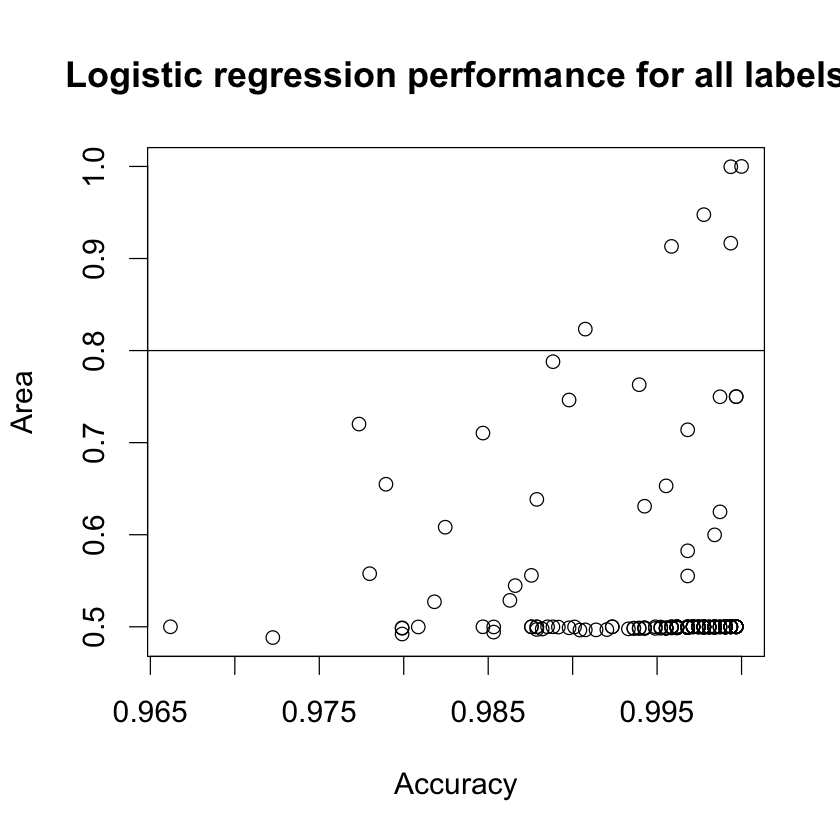

In [235]:
par(cex=1.5)
# Calculating areas from roc objects
aucs = vector(mode = "list", length = ncol(labels)-1)
for (i in 1:length(areas)){
    if (!is.numeric(areas[i][[1]])){
        aucs[i]= auc(areas[i][[1]])
    } else {
        aucs[i]=NA
    }
}
yy[yy==0] <- NA
plot(yy,aucs, ann=FALSE) %>% abline(h=0.8)
title(main="Logistic regression performance for all labels",xlab="Accuracy",ylab="Area",)

# Print high performing labels
label_names <- names(filtered_labels[,2:ncol(labels)]) 
label_names[which(aucs>0.8)]

**Analysis** : Most labels have very low area values. This means our logistic regression models couldn't learn a good classifier for them given the features. We can also see that all labels gave an accuracy > 0.9, showing how accuracy as a metric falls short in imbalanced class scenario. However, we can still explore further for the samples for which a good area value(>0.8) was obtained and check how many samples are assigned to these labels as seen below. Except *atp_synthase_inhibitor* all others have high number of samples, indicating that class imbalance continues to be an issue for logistic regression models.  

In [249]:
num_pos %>%
  filter(var %in% label_names[which(aucs>0.8)]) 

var,num_pos
<chr>,<int>
atp_synthase_inhibitor,8
cdk_inhibitor,218
glucocorticoid_receptor_agonist,175
hsp_inhibitor,63
proteasome_inhibitor,467
raf_inhibitor,148


### LDA
I sought to fix the class imbalance issue by running LDA for a label with small number of samples. I fed in the prior probabilities for the 2 classes as 0.5(also tried giving positive class a prior greater than 0.5) in the hopes that this would increase the importance of the positive class. However, the AUC value still continued to be low as you can see below. 

In [85]:
library(MASS)
library(tidyverse)
library(dplyr)
library(pROC)
library(recipes)
library(parsnip)
library(workflows)
library(dials)
# install.packages("discrim")
library(discrim)

out="acat_inhibitor"
# Creating training and testing set with PCA
idx = createDataPartition(filtered_labels$acat_inhibitor, p = 0.8, list = FALSE)
trn = filtered_features[idx, ]
tst = filtered_features[-idx, ]
pca <- prcomp(trn, center = TRUE, scale. = TRUE)
minComp <- get90varComp(pca)
trn <- as.data.frame(pca$x[,1:minComp])
tst <- as.data.frame(predict(pca, newdata = tst)[,1:minComp])
filtered_labels <- filtered_labels %>% mutate(across(c(2:207), as_factor)) 

# Preparing data and LDA model
rec <- recipe(~ ., data = trn %>% bind_cols(filtered_labels[idx,] %>% dplyr::select(all_of(out)))) %>%
        update_role(all_of(out), new_role = "outcome")
lda_mod <- discrim_linear(penalty = .1) %>% set_engine("MASS", prior = c(0.5,0.5))
wf <- workflow() %>% add_recipe(rec) %>% add_model(lda_mod)
set.seed(0408)

# fitting and result
lda_fit <- wf %>% fit(trn %>% bind_cols(filtered_labels[idx,]))
preds <- predict(lda_fit, new_data = tst)
roc <- roc(filtered_labels[-idx, out], as.numeric(preds[, ".pred_class", drop = TRUE]))
auc(roc)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.499

## Feature analysis
Now we shift our focus towards, identifying what features led to the performance for the 6 labels that gave good performance by logistic regression models. Since PCA doesn't provide model interpretation(each component has contributions from several features), this step can provide some feature to label relationships.

[1] "Important features for  atp_synthase_inhibitor  are: "
 [1] c.19  g.116 g.639 g.635 g.280 g.149 g.79  g.170 g.32  g.8   g.324 g.235
[13] g.372 g.13  g.538 g.254 g.63  g.244


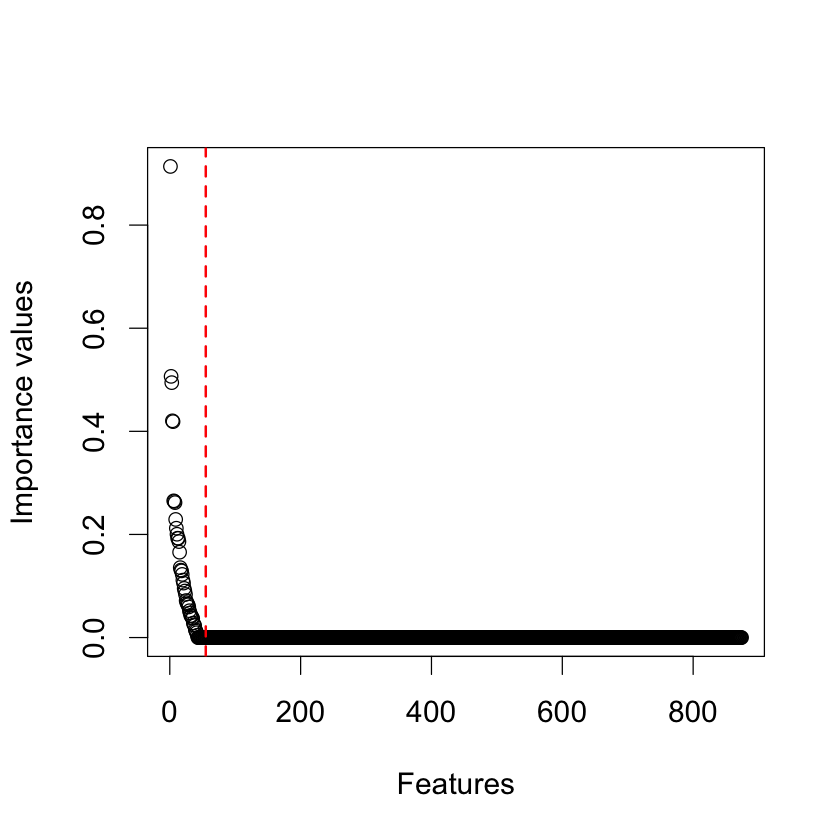

[1] "Important features for  cdk_inhibitor  are: "
 [1] g.215 g.432 c.23  g.620 g.179 g.262 g.121 g.679 g.225 g.111 g.763 g.628
[13] g.216 g.295 g.749 g.507 g.498 g.464 g.137 g.391 g.471 g.465 g.182 g.451
[25] g.656 c.95  g.242 g.187 g.211 g.759 g.631 g.108 g.494 g.433 g.212 g.526
[37] g.346 g.199 g.175 g.130 g.88  g.253 g.566 g.706 g.208 g.354 g.581 g.110
[49] g.95  g.255 g.23  g.363 c.68  g.395 g.640 g.476 g.49  g.272


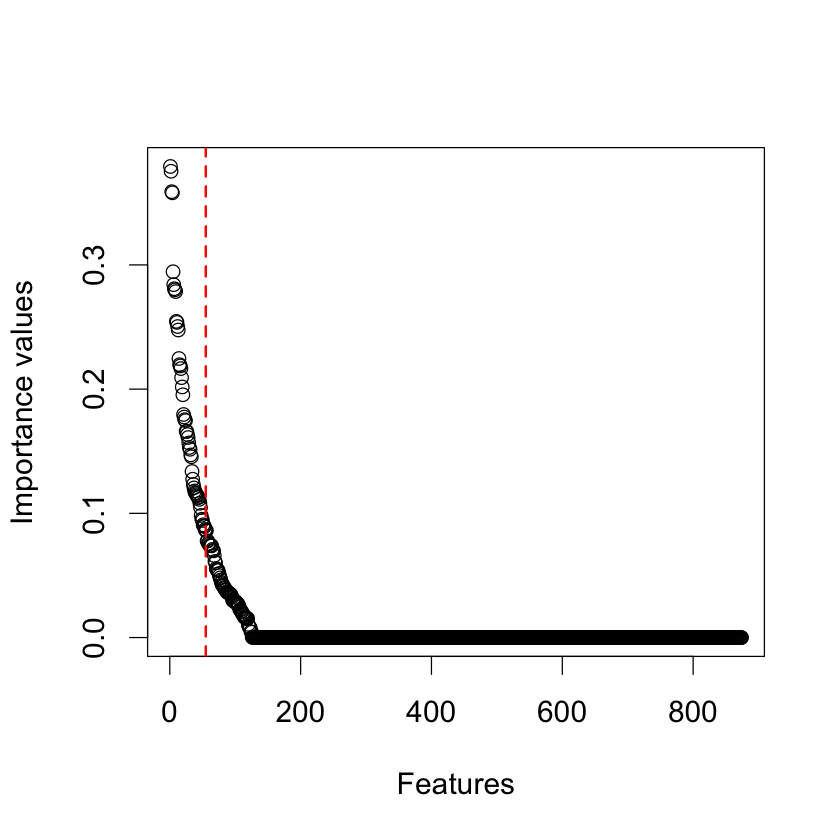

[1] "Important features for  glucocorticoid_receptor_agonist  are: "
 [1] g.175   g.100   g.122   g.418   g.538   g.277   g.510   g.562   g.611  
[10] g.273   g.706   g.231   g.521   g.139   g.357   g.726   g.590   cp_time
[19] g.748   g.570   g.516   g.181   g.652  


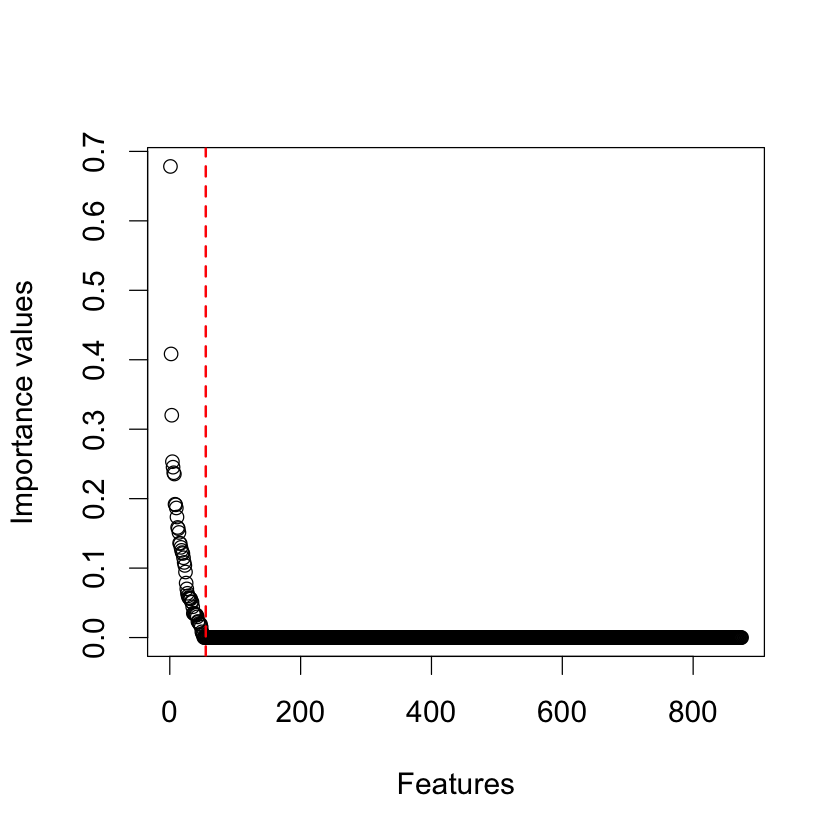

[1] "Important features for  hsp_inhibitor  are: "
 [1] g.493 g.262 g.104 g.648 g.267 g.445 g.331 g.29  g.263 g.403 g.481 g.638
[13] g.726 g.630 g.745 g.435 g.701 g.79  g.565 g.552 g.422 g.623 g.85  g.333
[25] g.396 g.99  g.472 g.232 g.45  g.452 g.205 g.153 g.528 g.166 g.580 g.149
[37] g.305 g.543 g.47  g.754 g.474 g.370 g.325 g.450 g.375 g.684 g.78  g.567
[49] g.292 g.466 g.348 g.654 g.456 g.526


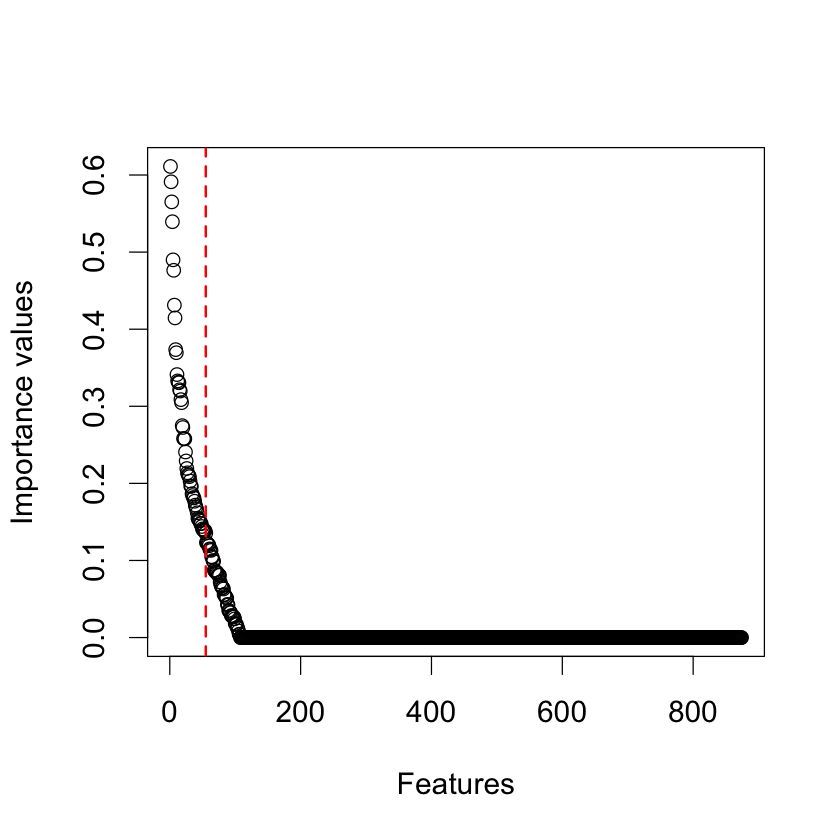

[1] "Important features for  proteasome_inhibitor  are: "
 [1] g.166 c.88  c.74  g.512 g.392 c.53  g.412 c.78  g.202 g.217 g.289 g.456
[13] g.385 g.485 g.192 g.493 g.170 g.164 g.758


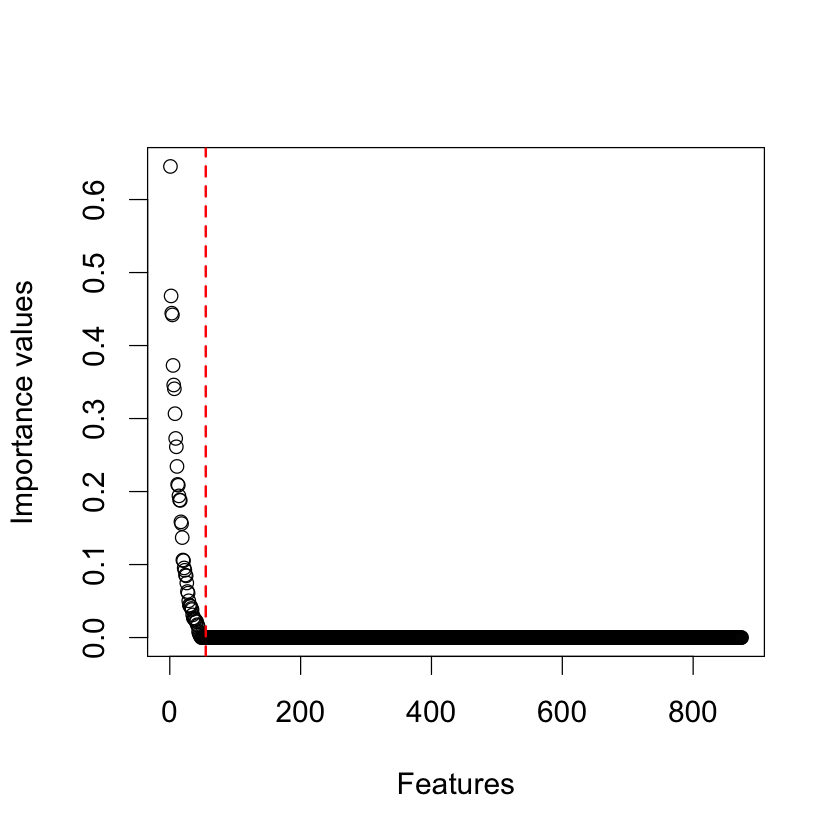

[1] "Important features for  raf_inhibitor  are: "
 [1] c.98  g.203 c.34  g.22  g.202 g.39  g.137 g.292 g.591 g.357 g.287 g.623
[13] g.635 c.30  g.509 g.207 g.766 g.528 g.557 g.620 g.403 g.239 g.99  g.493
[25] g.656 g.392 c.64  g.682 g.55  g.417 g.582 g.647 c.21  g.211 g.84  g.110
[37] g.42  g.267 g.600 g.106 g.139 c.7   g.626 g.336 g.117 g.479 g.60  g.504
[49] g.642 g.299 g.387 g.157 g.440 g.475 g.102 g.627 g.482 g.141 g.181


[[1]]
 [1] c.19  g.116 g.639 g.635 g.280 g.149 g.79  g.170 g.32  g.8   g.324 g.235
[13] g.372 g.13  g.538 g.254 g.63  g.244
874 Levels: c.0 c.1 c.10 c.11 c.12 c.13 c.14 c.15 c.16 c.17 c.18 c.19 ... g.99

[[2]]
 [1] g.215 g.432 c.23  g.620 g.179 g.262 g.121 g.679 g.225 g.111 g.763 g.628
[13] g.216 g.295 g.749 g.507 g.498 g.464 g.137 g.391 g.471 g.465 g.182 g.451
[25] g.656 c.95  g.242 g.187 g.211 g.759 g.631 g.108 g.494 g.433 g.212 g.526
[37] g.346 g.199 g.175 g.130 g.88  g.253 g.566 g.706 g.208 g.354 g.581 g.110
[49] g.95  g.255 g.23  g.363 c.68  g.395 g.640 g.476 g.49  g.272
874 Levels: c.0 c.1 c.10 c.11 c.12 c.13 c.14 c.15 c.16 c.17 c.18 c.19 ... g.99

[[3]]
 [1] g.175   g.100   g.122   g.418   g.538   g.277   g.510   g.562   g.611  
[10] g.273   g.706   g.231   g.521   g.139   g.357   g.726   g.590   cp_time
[19] g.748   g.570   g.516   g.181   g.652  
874 Levels: c.0 c.1 c.10 c.11 c.12 c.13 c.14 c.15 c.16 c.17 c.18 c.19 ... g.99

[[4]]
 [1] g.493 g.262 g.104 g.648 g.267 g.445 g.331 g.29  g.263 g.403 g.481 g.638
[13] g.726 g.630 g.745 g.435 g.701 g.79  g.565 g.552 g.422 g.623 g.85  g.333
[25] g.396 g.99  g.472 g.232 g.45  g.452 g.205 g.153 g.528 g.166 g.580 g.149
[37] g.305 g.543 g.47  g.754 g.474 g.370 g.325 g.450 g.375 g.684 g.78  g.567
[49] g.292 g.466 g.348 g.654 g.456 g.526
874 Levels: c.0 c.1 c.10 c.11 c.12 c.13 c.14 c.15 c.16 c.17 c.18 c.19 ... g.99

[[5]]
 [1] g.166 c.88  c.74  g.512 g.392 c.53  g.412 c.78  g.202 g.217 g.289 g.456
[13] g.385 g.485 g.192 g.493 g.170 g.164 g.758
874 Levels: c.0 c.1 c.10 c.11 c.12 c.13 c.14 c.15 c.16 c.17 c.18 c.19 ... g.99

[[6]]
 [1] c.98  g.203 c.34  g.22  g.202 g.39  g.137 g.292 g.591 g.357 g.287 g.623
[13] g.635 c.30  g.509 g.207 g.766 g.528 g.557 g.620 g.403 g.239 g.99  g.493
[25] g.656 g.392 c.64  g.682 g.55  g.417 g.582 g.647 c.21  g.211 g.84  g.110
[37] g.42  g.267 g.600 g.106 g.139 c.7   g.626 g.336 g.117 g.479 g.60  g.504
[49] g.642 g.299 g.387 g.157 g.440 g.475 g.102 g.627 g.482 g.141 g.181
874 Levels: c.0 c.1 c.10 c.11 c.12 c.13 c.14 c.15 c.16 c.17 c.18 c.19 ... g.99

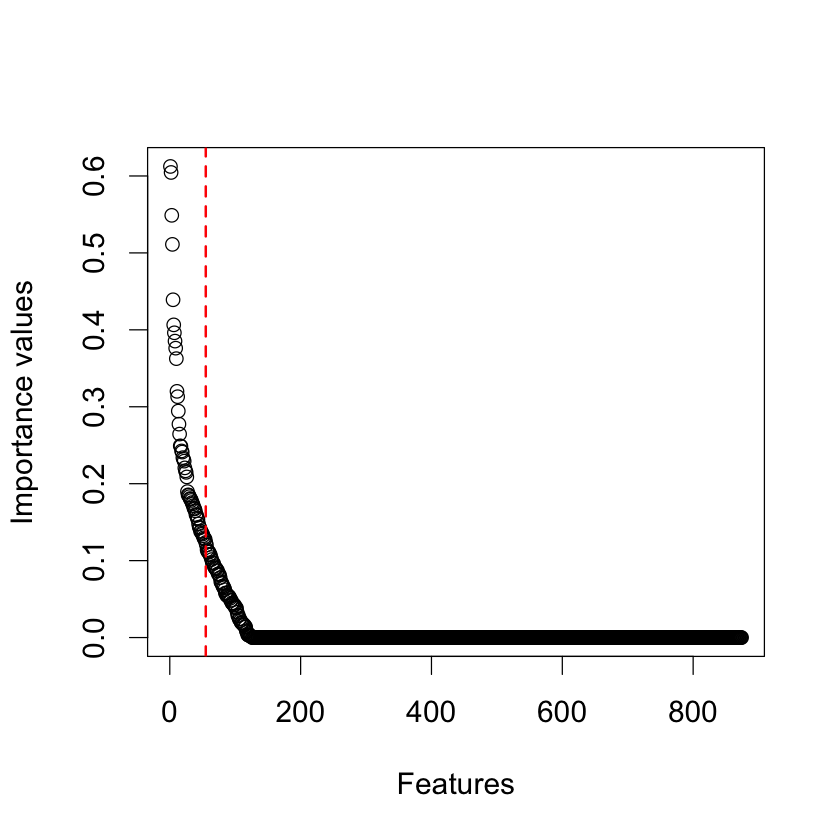

In [35]:
library(dplyr)
library(tidyverse)
options(warn=-1)
par(cex=1.5)
feature_analysis <- function(out) {
    set.seed(123)
    filtered_labels <- filtered_labels %>% mutate(across(c(2:207), as_factor)) 

    # Get best lambda value
    fit <- cv.glmnet(as.matrix(filtered_features), filtered_labels[,out], family = "binomial")
    # Calculate feature importance
    imps = varImp(fit$glmnet.fit, lambda = fit$lambda.min)
    # Sort the importance values
    imps <- cbind(rownames(imps),imps)
    sorted <-imps[order(-imps$Overall),]
    # Plot the sorted importance values 
    plot(1:nrow(sorted),sorted$Overall,xlab="Features",ylab="Importance values") %>% abline(v=55,col = "red",lty = "dashed",lwd = 2)
    # Print the features that account for 80% of total importance 
    main <- sorted %>%  slice(seq_len(which.max(cumsum(Overall) >= 0.8*sum(sorted$Overall))))
    print(paste("Important features for ",out, " are: "))
    print(main[,1], max.levels = 0)
    
}
map(c("atp_synthase_inhibitor","cdk_inhibitor","glucocorticoid_receptor_agonist","hsp_inhibitor",
      "proteasome_inhibitor","raf_inhibitor"), ~feature_analysis(.x))

**Analysis:** I have used cross validation with a regularized logistic regression to get the best value of lambda on the whole data for a particular label. This is done so that I can get the feature importances for the best lambda value. Feature importance is calculated using *caret* library's varImp method. Without the lambda input, varImp wouldn't know which lambda value to get feature importance values for. Note that in the earlier logistic regression analysis I did not run *cv.glmnet* to save runtime. 

The importance values are sorted and plotted to get an idea of how many features have an importance value greater than 0, indicating that these have a contribution to make to the label. A vertical line is also added to the plot to show the point where the number of features account for 80% of the total importance. This is a known method for feature selection when faced with a large number of features. The names of the features falling before the red line, are also printed for each label. 

Note that most important features for these 6 labels are usually gene expression and not cell viability. Below you can see some more analysis for the significant features identified above. I have taken intersection of features between all pairs of the 6 labels and displayed it in a matrix. There is no significant overlap between these identified features except g.493 which is important for raf_inhibitor, hsp_inhibitor and proteasome_inhibitor.

In [179]:
# all identified features (hard-coded because using values from previous cell)
one=c("c.19","g.116","g.639","g.635","g.280","g.149","g.79","g.170","g.32","g.8","g.324","g.235","g.372","g.13","g.538","g.254","g.63","g.244")
two=c("g.215","g.432","c.23","g.620","g.179","g.262","g.121","g.679","g.225","g.111","g.763","g.628","g.216","g.295","g.749","g.507","g.498","g.464","g.137","g.391","g.471","g.465","g.182","g.451","g.656","c.95","g.242","g.187","g.211","g.759","g.631","g.108","g.494","g.433","g.212","g.526","g.346","g.199","g.175","g.130","g.88","g.253","g.566","g.706","g.208","g.354","g.581","g.110","g.95","g.255","g.23","g.363","c.68","g.395","g.640","g.476","g.49","g.272")
three=c("g.175","g.100","g.122","g.418","g.538","g.277","g.510","g.562","g.611","g.273","g.706","g.231","g.521","g.139","g.357","g.726","g.590","cp_time","g.748","g.570","g.516","g.181","g.652")
four = c("g.493","g.262","g.104","g.648","g.267","g.445","g.331","g.29","g.263","g.403","g.481","g.638","g.726","g.630","g.745","g.435","g.701","g.79","g.565","g.552","g.422","g.623","g.85","g.333","g.396","g.99","g.472","g.232","g.45","g.452","g.205","g.153","g.528","g.166","g.580","g.149","g.305","g.543","g.47","g.754","g.474","g.370","g.325","g.450","g.375","g.684","g.78","g.567","g.292","g.466","g.348","g.654","g.456","g.526")
five=c("g.166","c.88","c.74","g.512","g.392","c.53","g.412","c.78","g.202","g.217","g.289","g.456","g.385","g.485","g.192","g.493","g.170","g.164","g.758")
six=c("c.98","g.203","c.34","g.22","g.202","g.39","g.137","g.292","g.591","g.357","g.287","g.623","g.635","c.30","g.509","g.207","g.766","g.528","g.557","g.620","g.403","g.239","g.99","g.493","g.656","g.392","c.64","g.682","g.55","g.417","g.582","g.647","c.21","g.211","g.84","g.110","g.42","g.267","g.600","g.106","g.139","c.7","g.626","g.336","g.117","g.479","g.60","g.504","g.642","g.299","g.387","g.157","g.440","g.475","g.102","g.627","g.482","g.141","g.181")

# getting intersection between all pairs of the 6 labels
l <- list(one,two,three,four,five,six)
nms <- combn( c("atp_synthase_inhibitor","cdk_inhibitor","glucocorticoid_receptor_agonist","hsp_inhibitor",
      "proteasome_inhibitor","raf_inhibitor") , 2 , simplify = FALSE )
names(l) <- c("atp_synthase_\ninhibitor","cdk_inhibitor","glucocorticoid_\nreceptor_agonist","hsp_inhibitor",
      "proteasome_\ninhibitor","raf_inhibitor")
# Make the combinations of list elements
ll <- combn( l , 2 , simplify = FALSE )
# Intersect the list elements
out <- lapply( ll , function(x)  intersect( x[[1]] , x[[2]] )  )

# Store intersections in matrix for easy display           
mat = matrix(,6,6)   
rownames(mat) <- names(l)
colnames(mat) <- names(l)
k<-1     
for (i in 1:6){
    for(j in i:6){
        if(i!=j){
            if (length(out[k][[1]])!=0){
                mat[i,j] <-  paste(out[k][[1]],collapse=" , ")
            }
            k <- k+1
        }  
    }
}
mat


,atp_synthase_ inhibitor,cdk_inhibitor,glucocorticoid_ receptor_agonist,hsp_inhibitor,proteasome_ inhibitor,raf_inhibitor
atp_synthase_ inhibitor,NA,NA,g.538,"g.149 , g.79",g.170,g.635
cdk_inhibitor,NA,NA,"g.175 , g.706","g.262 , g.526",NA,"g.620 , g.137 , g.656 , g.211 , g.110"
glucocorticoid_ receptor_agonist,NA,NA,NA,g.726,NA,"g.139 , g.357 , g.181"
hsp_inhibitor,NA,NA,NA,NA,"g.493 , g.166 , g.456","g.493 , g.267 , g.403 , g.623 , g.99 , g.528 , g.292"
proteasome_ inhibitor,NA,NA,NA,NA,NA,"g.392 , g.202 , g.493"
raf_inhibitor,NA,NA,NA,NA,NA,NA


## Conclusion
This is a complex problem with a huge dataset of over 23,814 samples and 875 features. Using these we had to predict for 206 labels, where one sample could be assigned to more than 1 label. On top of that some samples had no labels. For classification training purposes, the dataset suffers from a class imbalance issue such that there are not enough positive class samples. We were also hampered by computational capacity in our analysis. 

Starting our analysis with gradient boosted trees and running into runtime issues, I then moved to label specific logistic regression. Learning about class imbalance I then tried Linear discriminant analysis by specifying the same priors for both classes(0 and 1). However when that didn't work I made the problem simpler by analyzing the features contributing to the well performing labels from logistic regression model. The analysis revealed that a lot more gene expression features(g.) contribute towards the labels than cell viability(c.) features. Though there was not much overlap, g.493 may be a strong contributor for some of the labels in our dataset. 